## Initial SetUp

In [360]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # for visualizing missing data
import importlib

# Make plots appear in the notebook
%matplotlib inline

# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Load the dataset
# Assuming the dataset folder is in the current directory
df = pd.read_csv('data/credit_score_dataset.csv')

## Basic Data Exploration

In [361]:
df.head()

,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529544,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.2802216,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.69952126,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580744,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.42015309,3


In [362]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (100000, 27)


In [363]:
# Get information about the dataset (data types, non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate             90151 non-null   fl

### Separate numerical and categorical features in distinct variables

In [364]:
# Already numerical features
true_numeric = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Delay_from_due_date',
    'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio',
    'Credit_Score'
]

# True categorical features
categorical_features = [
    'ID',  # identifier
    'Customer_ID',  # identifier
    'Month',
    'Name',
    'City',
    'Street',
    'SSN',  # identifier
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Credit_History_Age',  # special handling needed because contains "Years and Months"
    'Payment_of_Min_Amount'  # likely Yes/No
]

# Features that should be numerical but are currently 'object'
numeric_to_convert = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly'
]

## Handling Columns that should be numeric

In [365]:
import src.preprocessing.numeric_features.numeric_features_processing as numeric_features_processing
importlib.reload(numeric_features_processing)
from src.preprocessing.numeric_features.numeric_features_processing import *

### Checking problems that impede conversion to numeric

In [366]:
# First, let's check which problematic values impede the conversion to numeric
problematic_values = check_problematic_values(df, numeric_to_convert)


Problematic values in column 'Annual_Income':
Annual_Income
42904.26_     5
14388.79_     5
132643.71_    4
45455.94_     4
35038.35_     4
             ..
42900.18_     1
60576.72_     1
16297.34_     1
29469.98_     1
37188.1_      1
Name: count, Length: 5090, dtype: int64
Total problematic entries: 6292

Problematic values in column 'Num_of_Loan':
Num_of_Loan
2_       695
3_       638
4_       636
0_       495
1_       479
7_       376
6_       347
5_       300
9_       145
8_       133
597_       1
92_        1
1347_      1
1185_      1
235_       1
1459_      1
630_       1
359_       1
1225_      1
131_       1
1311_      1
1129_      1
143_       1
1131_      1
27_        1
1171_      1
227_       1
378_       1
1219_      1
527_       1
1027_      1
696_       1
1132_      1
Name: count, dtype: int64
Total problematic entries: 4267

Problematic values in column 'Num_of_Delayed_Payment':
Num_of_Delayed_Payment
8_       155
12_      144
15_      141
19_      139
17_      138
10_

### Applying cleaning rules for conversion

In [367]:
# Define cleaning rules based on observed patterns
cleaning_rules = {
    'remove_suffix': '_',
}

# Apply cleaning rules to each column
for column in numeric_to_convert:
    df[column] = clean_numeric_values(df, column, cleaning_rules)

# Final check - verify if any problematic values remain
print("\nChecking for remaining problematic values after cleaning:")
remaining_issues = check_problematic_values(df, numeric_to_convert)
print(f"Remaining issues: {remaining_issues}")


Checking for remaining problematic values after cleaning:
Remaining issues: {}


### Applying the conversion to numeric feature type

In [368]:
# Now we can convert the columns to numeric type without problems
for col in numeric_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


### Defining the Initial Numeric Features List

In [369]:
# create final numeric columns list
numeric_features = true_numeric + numeric_to_convert


# Print the data types after conversion
print("\nAfter conversion:")
print("\nNumeric columns:")
for col in numeric_features:
    print(f"{col}: {df[col].dtype}")



After conversion:

Numeric columns:
Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64
Annual_Income: float64
Num_of_Loan: float64
Num_of_Delayed_Payment: float64
Changed_Credit_Limit: float64
Outstanding_Debt: float64
Amount_invested_monthly: float64


## Categorical Features - Basic Analysis and Cleaning 

In [370]:
import src.preprocessing.categorical_features_handling as categorical_features_handling
importlib.reload(categorical_features_handling)
from src.preprocessing.categorical_features_handling import *

### Checking unique categories for each Feature

In [371]:
list_unique_categories(df, categorical_features)


Column 'ID' (90058 uniques):
the length of the list is too long to be printed entirely. Sample:
['0x1603', '0x1604', '0x1605', '0x1607', '0x1608', '0x1609', '0x160e', '0x160f', '0x1610', '0x1611']

Column 'Customer_ID' (12500 uniques):
the length of the list is too long to be printed entirely. Sample:
['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb', 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08']

Column 'Month' (8 uniques):
['February', 'April', 'May', 'June', 'July', 'August', 'January', 'March']

Column 'Name' (10139 uniques):
the length of the list is too long to be printed entirely. Sample:
['Aaron Maashoh', 'Rick Rothackerj', 'Langep', 'Jasond', 'Deepaa', 'Np', 'Nadiaq', 'Annk', 'Charlie Zhur', 'Jamesj']

Column 'City' (4 uniques):
['Lonton', 'Standhampton', 'BadShire', 'ZeroVille']

Column 'Street' (31 uniques):
['Oxford Street', 'Old Street', 'Downing Street', 'Jubilee Street', 'Elm Street', 'Market Street', 'King Street', 'Abbey Driv

{}

### Dropping identifiers features

In [372]:
# drop the columns that are purely identifiers and that can add bias to the model
df = df.drop(columns=["ID","Customer_ID","Name","SSN"])

cleaned_categorical_features = ['Month','Occupation', 'City', 'Payment_of_Min_Amount']

### Cleaning the features "Street" and "Credit Mix"

In [373]:
# Correct street spacing
df = fix_street_spacing(df)

# Correct credit mix, suppose that _ means no credit mix
df['Credit_Mix'] = df['Credit_Mix'].replace('_', 'No Credit Mix')


cleaned_categorical_features += ["Street","Credit_Mix"]

### Handling the feature "Type of Loan" - Converting it in Multiple Numeric Features

In [374]:
# Type of Loan
top_loan_types = analyze_loan_types(df, 'Type_of_Loan', 20)


Top 20 Loan Types (out of 6260 unique values):
Total records analyzed: 100000

Detailed breakdown:
 1. Not Specified                                                           1,272 records (1.27%)
 2. Credit-Builder Loan                                                     1,143 records (1.14%)
 3. Debt Consolidation Loan                                                 1,133 records (1.13%)
 4. Personal Loan                                                           1,128 records (1.13%)
 5. Student Loan                                                            1,117 records (1.12%)
 6. Payday Loan                                                             1,061 records (1.06%)
 7. Mortgage Loan                                                           1,058 records (1.06%)
 8. Auto Loan                                                               1,024 records (1.02%)
 9. Home Equity Loan                                                        1,015 records (1.01%)
10. Personal Loan,

#### Creating Multiple Binary Features from the categories of "Type of Loan"

In [375]:
# grouping unique categories
loan_unique_values = df['Type_of_Loan'].nunique()

df = transform_loan_types(df)

# Verify the transformation
print(f"\nOriginal unique values:", {loan_unique_values})
print("\nBinary Features (numeric) created from the categories of 'Type of Loan':")
for col in [c for c in df.columns if c.startswith('Has_')]:
    print(f"- {col}: {df[col].sum():,} records")
print(f"- Loan_Type_Count: {df['Loan_Type_Count'].count():,} records\n")

print(f"Created also the column Loan_Type_Count that counts the number of loan types per customer.")

Discovered 9 loan types with at least 10 occurrences:
- Payday Loan: 28,705 occurrences
- Credit-Builder Loan: 28,534 occurrences
- Not Specified: 28,523 occurrences
- Home Equity Loan: 28,246 occurrences
- Mortgage Loan: 28,230 occurrences
- Personal Loan: 28,024 occurrences
- Student Loan: 27,994 occurrences
- Debt Consolidation Loan: 27,868 occurrences
- Auto Loan: 27,456 occurrences

Created binary features for 9 loan types

Original unique values: {6260}

Binary Features (numeric) created from the categories of 'Type of Loan':
- Has_Payday_Loan: 28,705 records
- Has_Credit_Builder_Loan: 28,534 records
- Has_Not_Specified: 28,523 records
- Has_Home_Equity_Loan: 28,246 records
- Has_Mortgage_Loan: 28,230 records
- Has_Personal_Loan: 28,024 records
- Has_Student_Loan: 27,994 records
- Has_Debt_Consolidation_Loan: 27,868 records
- Has_Auto_Loan: 27,456 records
- Loan_Type_Count: 100,000 records

Created also the column Loan_Type_Count that counts the number of loan types per customer.

#### Dropping "Type of Loan" and adding the derived binary features to the numeric features list

In [376]:
# Drop the original Type_of_Loan column
df.drop(columns=['Type_of_Loan'], inplace=True)

# Add the transformed columns to the numeric_features list, since they are already encoded
numeric_features += [c for c in df.columns if c.startswith('Has_')]
numeric_features += ["Loan_Type_Count"]

### Handling the feature "Credit History Age" - Converting it to numeric

In [377]:
# handle credit history age to be numeric
df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_credit_history_age)

numeric_features += ["Credit_History_Age"]

## Final list of categorical features

In [378]:
#print the list of cleaned categorical features
categorical_features = cleaned_categorical_features

print("\nCategorical features:")
for col in categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical features:
Month: object
Occupation: object
City: object
Payment_of_Min_Amount: object
Street: object
Credit_Mix: object


## Final list of numeric features

In [379]:
#print the list of cleaned numeric features
print("\nNumeric features:\n")
for col in numeric_features:
    print(f"{col}: {df[col].dtype}")


Numeric features:

Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64
Annual_Income: float64
Num_of_Loan: float64
Num_of_Delayed_Payment: float64
Changed_Credit_Limit: float64
Outstanding_Debt: float64
Amount_invested_monthly: float64
Has_Payday_Loan: int64
Has_Credit_Builder_Loan: int64
Has_Not_Specified: int64
Has_Home_Equity_Loan: int64
Has_Mortgage_Loan: int64
Has_Personal_Loan: int64
Has_Student_Loan: int64
Has_Debt_Consolidation_Loan: int64
Has_Auto_Loan: int64
Loan_Type_Count: int64
Credit_History_Age: float64


## Advanced Features Cleaning and Analysis

### Cleaning of Numeric Features and Before/After Analysis

In [ ]:
# Define constraints by feature
CONSTRAINTS = {
    'Age': {'min': 10, 'max': 150, 'integer': True, 'outlier_method': 'domain'},  # Domain knowledge-based constraints
    
    'Annual_Income': {'min': 0, 'max': None, 'integer': False, 'outlier_method': 'iqr'}, # Income typically has skewed distribution, IQR works well
    'Monthly_Inhand_Salary': {'min': 0, 'max': None, 'integer': False, 'outlier_method': 'iqr'}, 
    'Amount_invested_monthly': {'min': 0, 'max': None, 'integer': False, 'outlier_method': 'iqr'}, 
    
    'Num_Bank_Accounts': {'min': 0, 'max': 20, 'integer': True, 'outlier_method': 'domain'},
    'Num_Credit_Card': {'min': 0, 'max': 15, 'integer': True, 'outlier_method': 'domain'},

    'Num_of_Loan': {'min': 0, 'max': 25, 'integer': True, 'outlier_method': 'domain'},
    'Interest_Rate': {'min': 0, 'max': 100, 'integer': False, 'outlier_method': 'domain'},
    'Outstanding_Debt': {'min': 0, 'max': None, 'integer': False, 'outlier_method': 'iqr'},

    'Delay_from_due_date': {'min': 0, 'max': 180, 'integer': True, 'outlier_method': 'domain'},
    'Num_of_Delayed_Payment': {'min': 0, 'max': None, 'integer': True, 'outlier_method': 'zscore'}, # Z-score works well for count data
    'Changed_Credit_Limit': {'min': None, # can be negative 
                              'max': None, 'integer': False, 'outlier_method': 'zscore'}, # Z-score for bidirectional changes
    'Num_Credit_Inquiries': {'min': 0, 'max': 50, 'integer': True, 'outlier_method': 'domain'},
    'Credit_Utilization_Ratio': {'min': 0, 'max': 100, 'integer': False, 'outlier_method': 'domain'},
    
    'Credit_Score': {'min': 0, 'max': 3, 'integer': True, 'outlier_method': 'domain'},

    'Credit_History_Age': {'min': 0, 'max': 35, 'integer': False, 'outlier_method': 'domain'},

    'Has_Payday_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Credit_Builder_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Not_Specified': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Home_Equity_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Mortgage_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Personal_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Student_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Debt_Consolidation_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Has_Auto_Loan': {'min': 0, 'max': 1, 'integer': True, 'outlier_method': 'domain'},
    'Loan_Type_Count': {'min': 0, 'max': 9, 'integer': True, 'outlier_method': 'domain'},
    
}

for feature in numeric_features:
    analyze_numeric_feature(df, feature)
    df = handle_inconsistent_numeric_values(df, feature, CONSTRAINTS)
    analyze_numeric_feature(df, feature, mode='After Cleaning')


Cleaning Age...
  Found 790 below-minimum constraint. Replacing with NaN
  Found 1606 values above max threshold 150

Cleaning Monthly_Inhand_Salary...
  Using IQR method for Monthly_Inhand_Salary
  Found 1546 outliers using IQR method
  IQR bounds: -4847.92 to 12413.26

Cleaning Num_Bank_Accounts...
  Found 20 below-minimum constraint. Replacing with NaN
  Found 1184 values above max threshold 20

Cleaning Num_Credit_Card...
  Found 2041 values above max threshold 15

Cleaning Interest_Rate...
  Found 1808 values above max threshold 100

Cleaning Delay_from_due_date...
  Found 533 below-minimum constraint. Replacing with NaN

Cleaning Num_Credit_Inquiries...
  Found 1468 values above max threshold 50

Cleaning Credit_Utilization_Ratio...

Cleaning Credit_Score...

Cleaning Annual_Income...
  Using IQR method for Annual_Income
  Found 2493 outliers using IQR method
  IQR bounds: -60507.43 to 152720.52

Cleaning Num_of_Loan...
  Found 3474 below-minimum constraint. Replacing with NaN
 

### Handling Missing values for Numeric Features

In [381]:
import src.preprocessing.missing_values_handling as missing_values_handling
importlib.reload(missing_values_handling)
from src.preprocessing.missing_values_handling import *

In [382]:
# Analyze missing values
missing_stats = analyze_missing_values(df)
print("\nMissing Value Statistics:")
print(missing_stats)

Total features with missing values: 21

Missing Value Statistics:
                          Missing Count  Missing Percentage Data Type
Monthly_Inhand_Salary             25141               25.14   float64
Amount_invested_monthly           24828               24.83   float64
Credit_History_Age                18209               18.21   float64
Num_of_Delayed_Payment            17369               17.37   float64
Age                               16884               16.88   float64
Outstanding_Debt                  14730               14.73   float64
Num_of_Loan                       14088               14.09   float64
Num_Credit_Inquiries              13366               13.37   float64
Annual_Income                     12587               12.59   float64
Changed_Credit_Limit              12115               12.12   float64
Num_Credit_Card                   12103               12.10   float64
Interest_Rate                     11657               11.66   float64
Num_Bank_Accounts       

In [383]:
import src.preprocessing.missing_values_imputation as missing_values_imputation
importlib.reload(missing_values_imputation)
from src.preprocessing.missing_values_imputation import *

Evaluating imputation methods for 15 numeric columns

Evaluating imputation methods for column 'Age'
  Testing mean...
    RMSE: 10.8126, Distribution Score: 12.79%
  Testing median...
    RMSE: 10.8181, Distribution Score: 12.87%
  Testing mode...
    RMSE: 11.7715, Distribution Score: 12.74%
  Testing knn_3...
    RMSE: 8.1648, Distribution Score: 3.66%
  Best method for 'Age': knn_3

Evaluating imputation methods for column 'Annual_Income'
  Testing mean...
    RMSE: 35203.0086, Distribution Score: 20.42%
  Testing median...
    RMSE: 37185.3141, Distribution Score: 21.91%
  Testing mode...
    RMSE: 36108.5404, Distribution Score: 21.50%
  Testing knn_3...
    RMSE: 17672.2974, Distribution Score: 2.66%
  Best method for 'Annual_Income': knn_3

Evaluating imputation methods for column 'Monthly_Inhand_Salary'
  Testing mean...
    RMSE: 2899.7580, Distribution Score: 28.85%
  Testing median...
    RMSE: 3061.9431, Distribution Score: 32.25%
  Testing mode...
    RMSE: 3564.4442, Dis

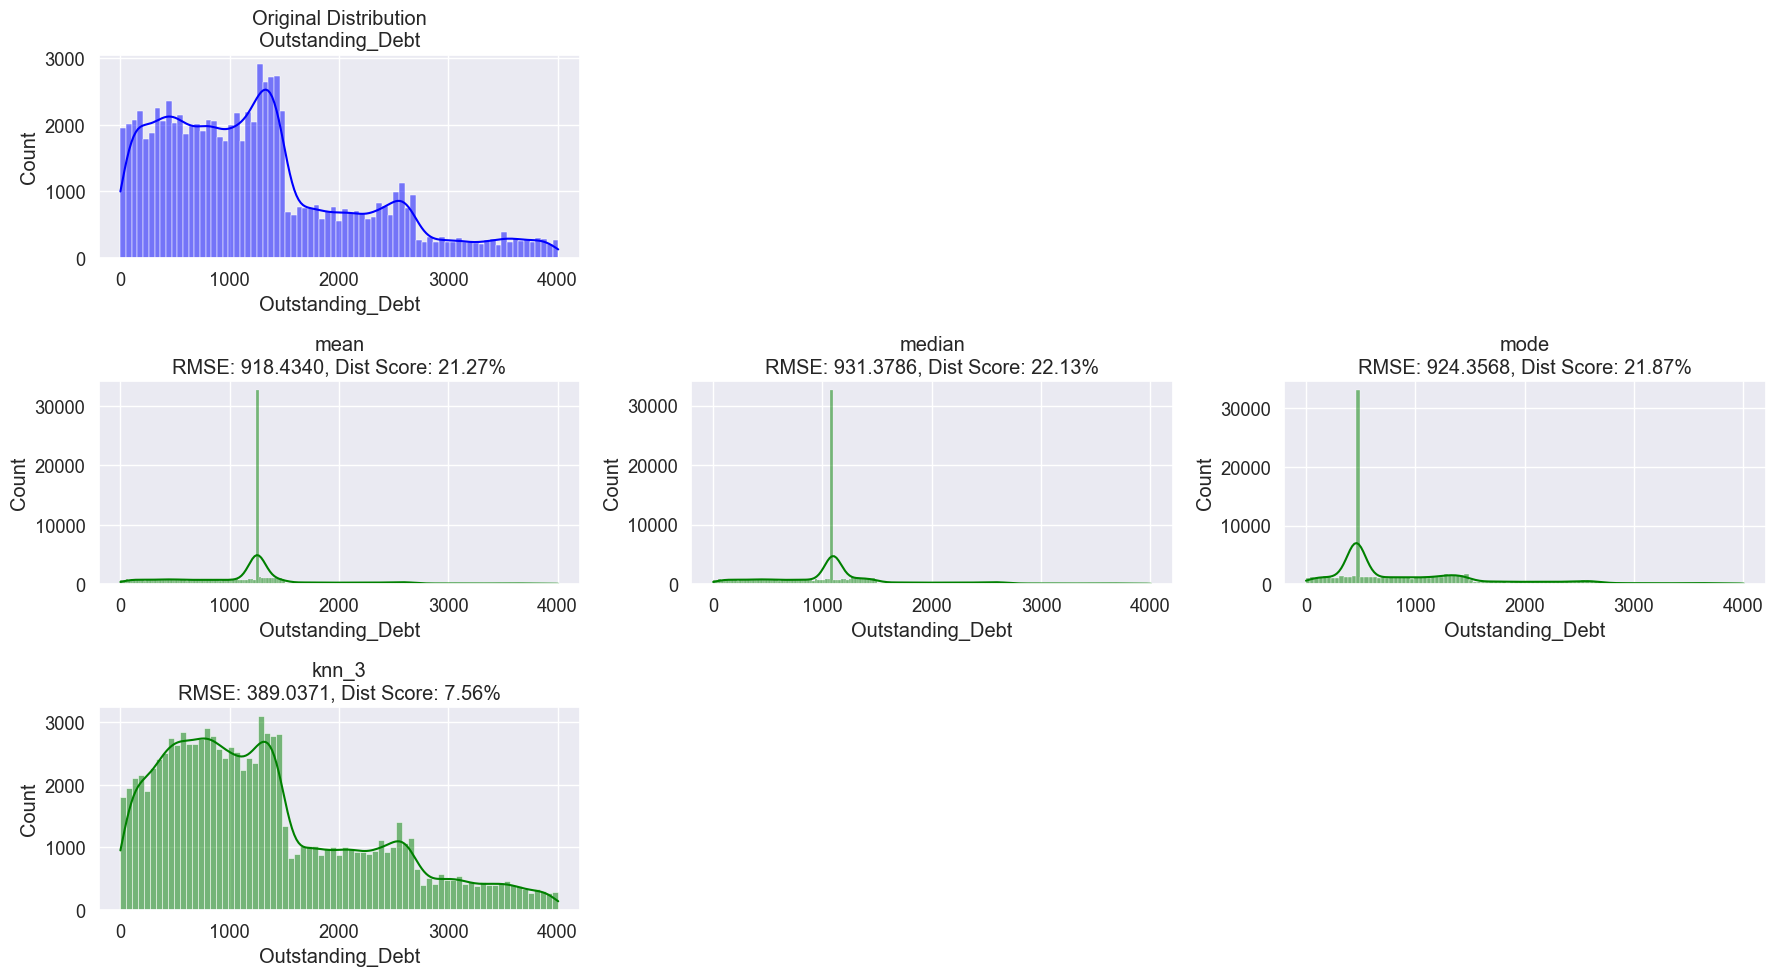

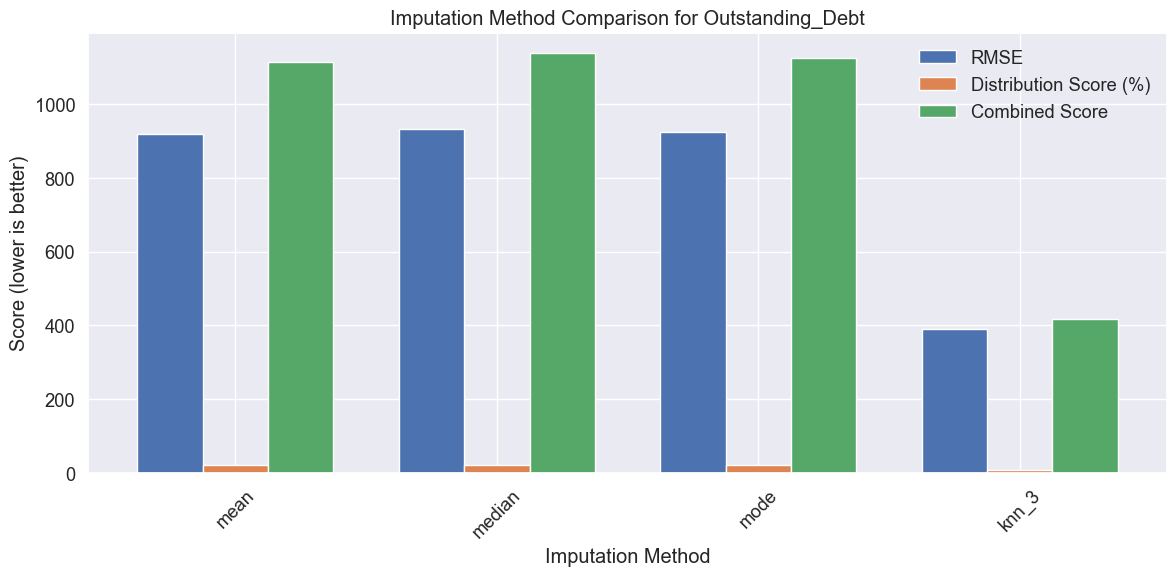

Imputing 6 categorical columns using 'new_category'
  Imputing 'Month' (9938 missing values)
    Using 'Missing' as a new category
  Imputing 'City' (9851 missing values)
    Using 'Missing' as a new category
  Imputing 'Street' (9920 missing values)
    Using 'Missing' as a new category
  Imputing 'Occupation' (9944 missing values)
    Using 'Missing' as a new category
  Imputing 'Credit_Mix' (9915 missing values)
    Using 'Missing' as a new category
  Imputing 'Payment_of_Min_Amount' (9957 missing values)
    Using 'Missing' as a new category

Verification:
Original missing values: 284135
Remaining missing values: 0


In [384]:
# Impute numeric features with automatic method selection
df_numeric_imputed, evaluator = auto_impute_numeric_features(df)

# Visualize method comparison for a specific column
evaluator.visualize_method_comparison(df, 'Outstanding_Debt')

# Impute categorical features
df_fully_imputed = auto_impute_categorical_features(df_numeric_imputed, default_method='new_category')

# Verify imputation
print("\nVerification:")
print(f"Original missing values: {df.isnull().sum().sum()}")
print(f"Remaining missing values: {df_fully_imputed.isnull().sum().sum()}")


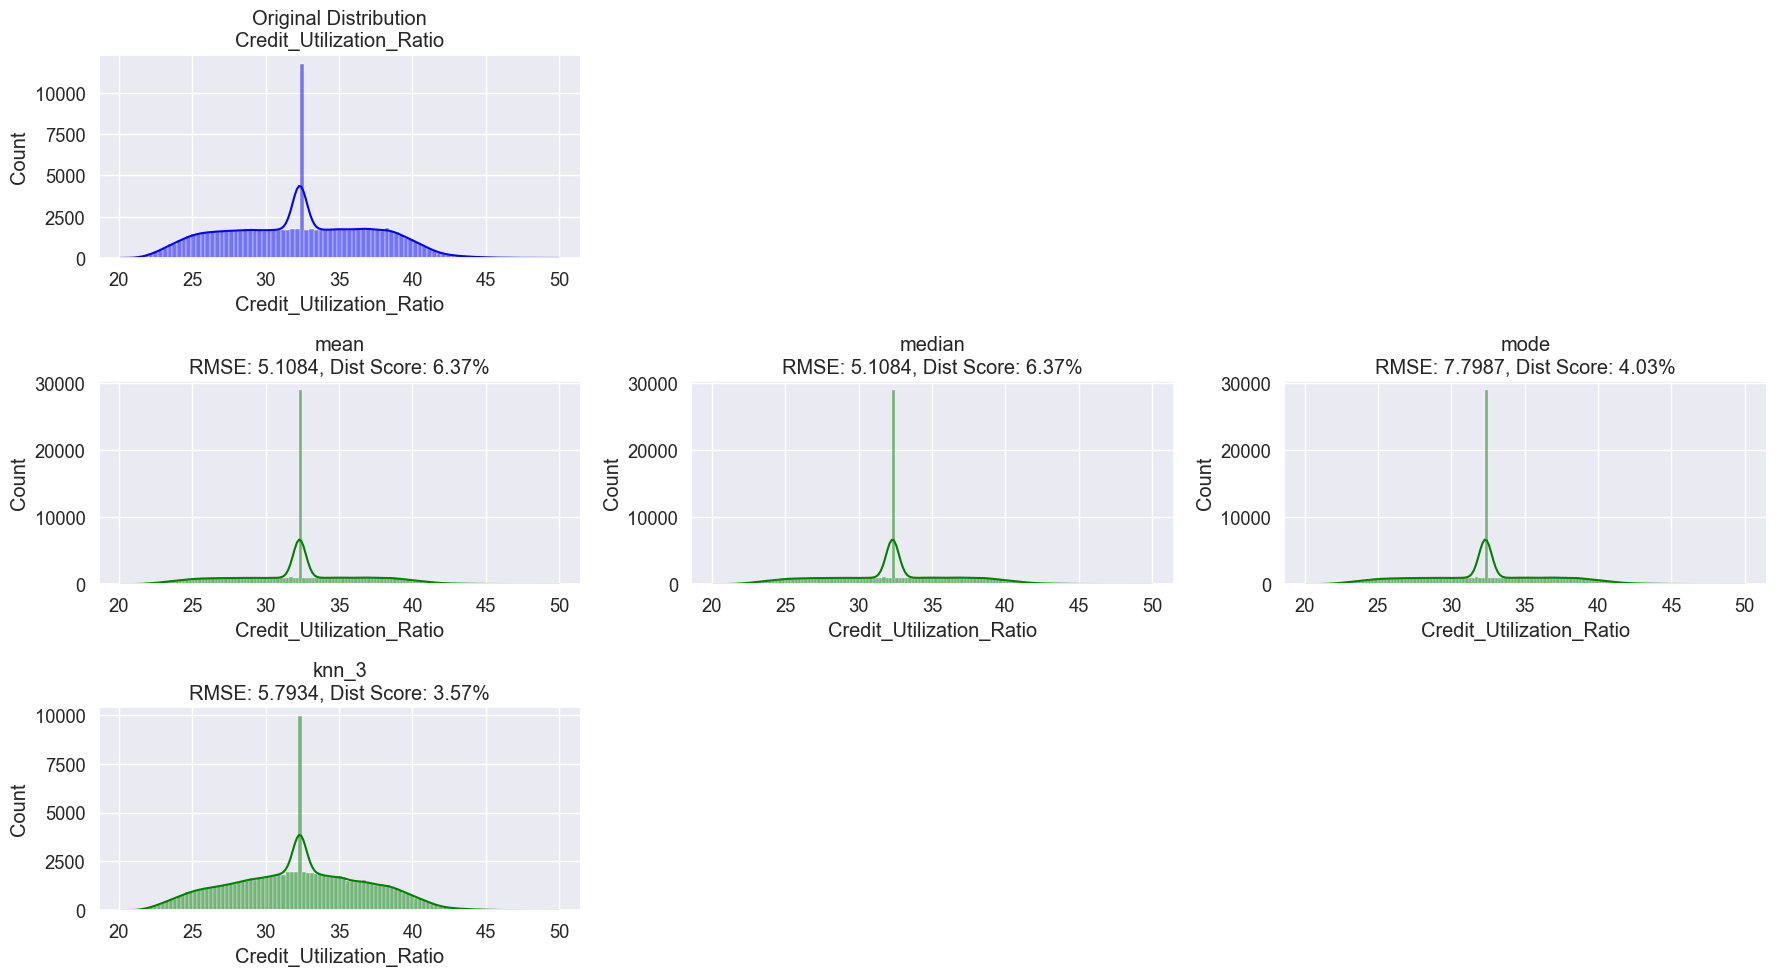

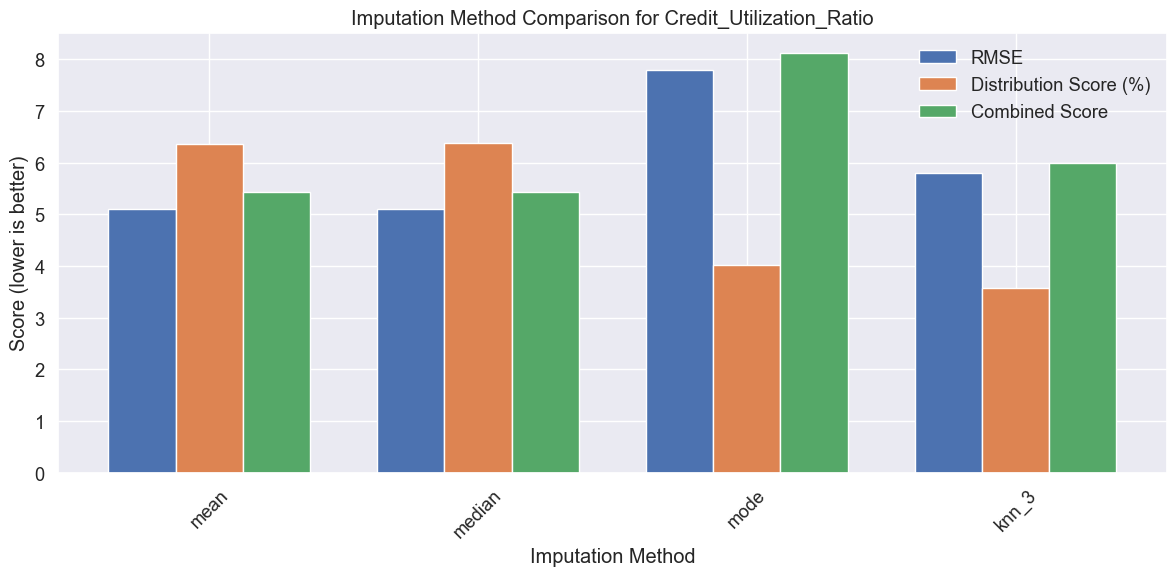

In [395]:
# Visualize method comparison for a specific column
evaluator.visualize_method_comparison(df, 'Credit_Utilization_Ratio')

c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\missing_values_handling.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

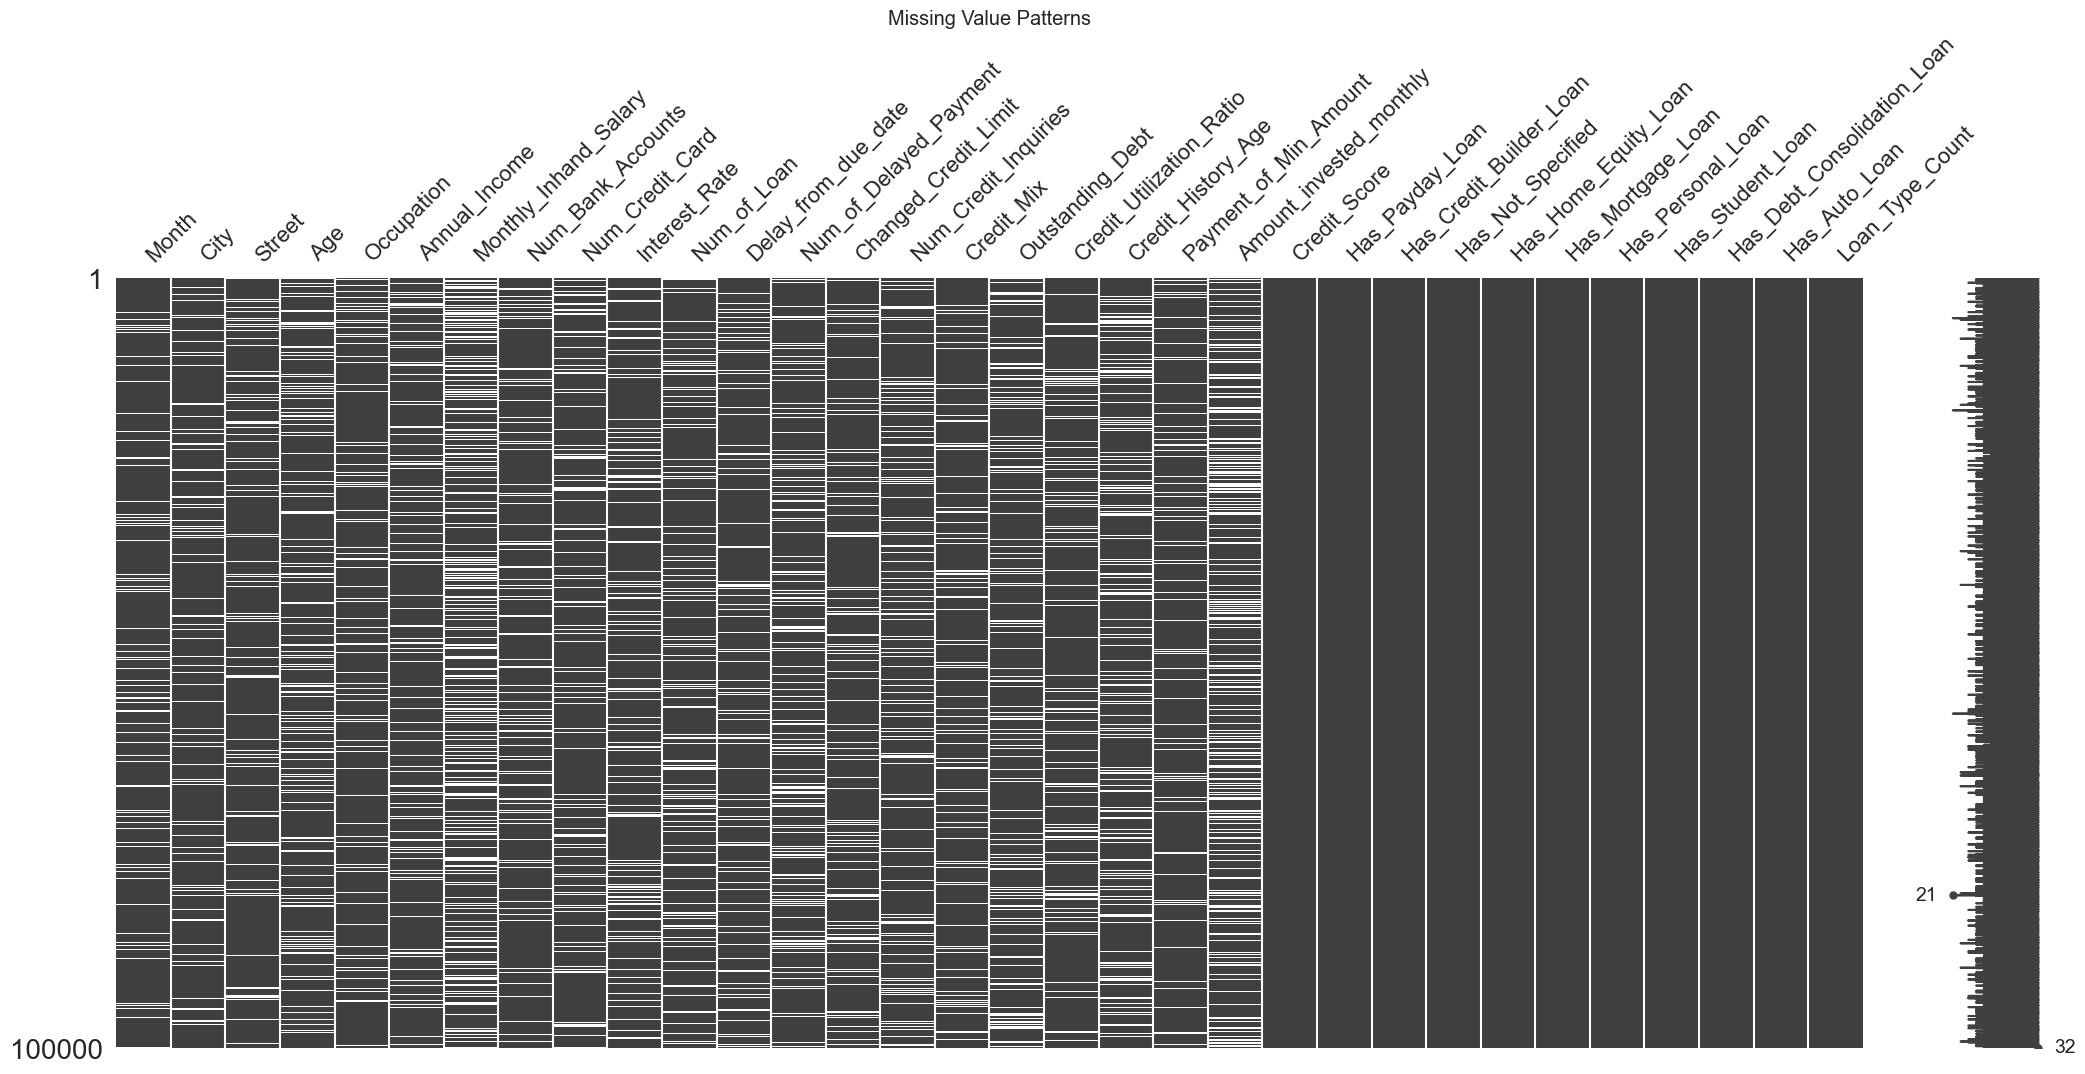

<Figure size 1000x800 with 0 Axes>

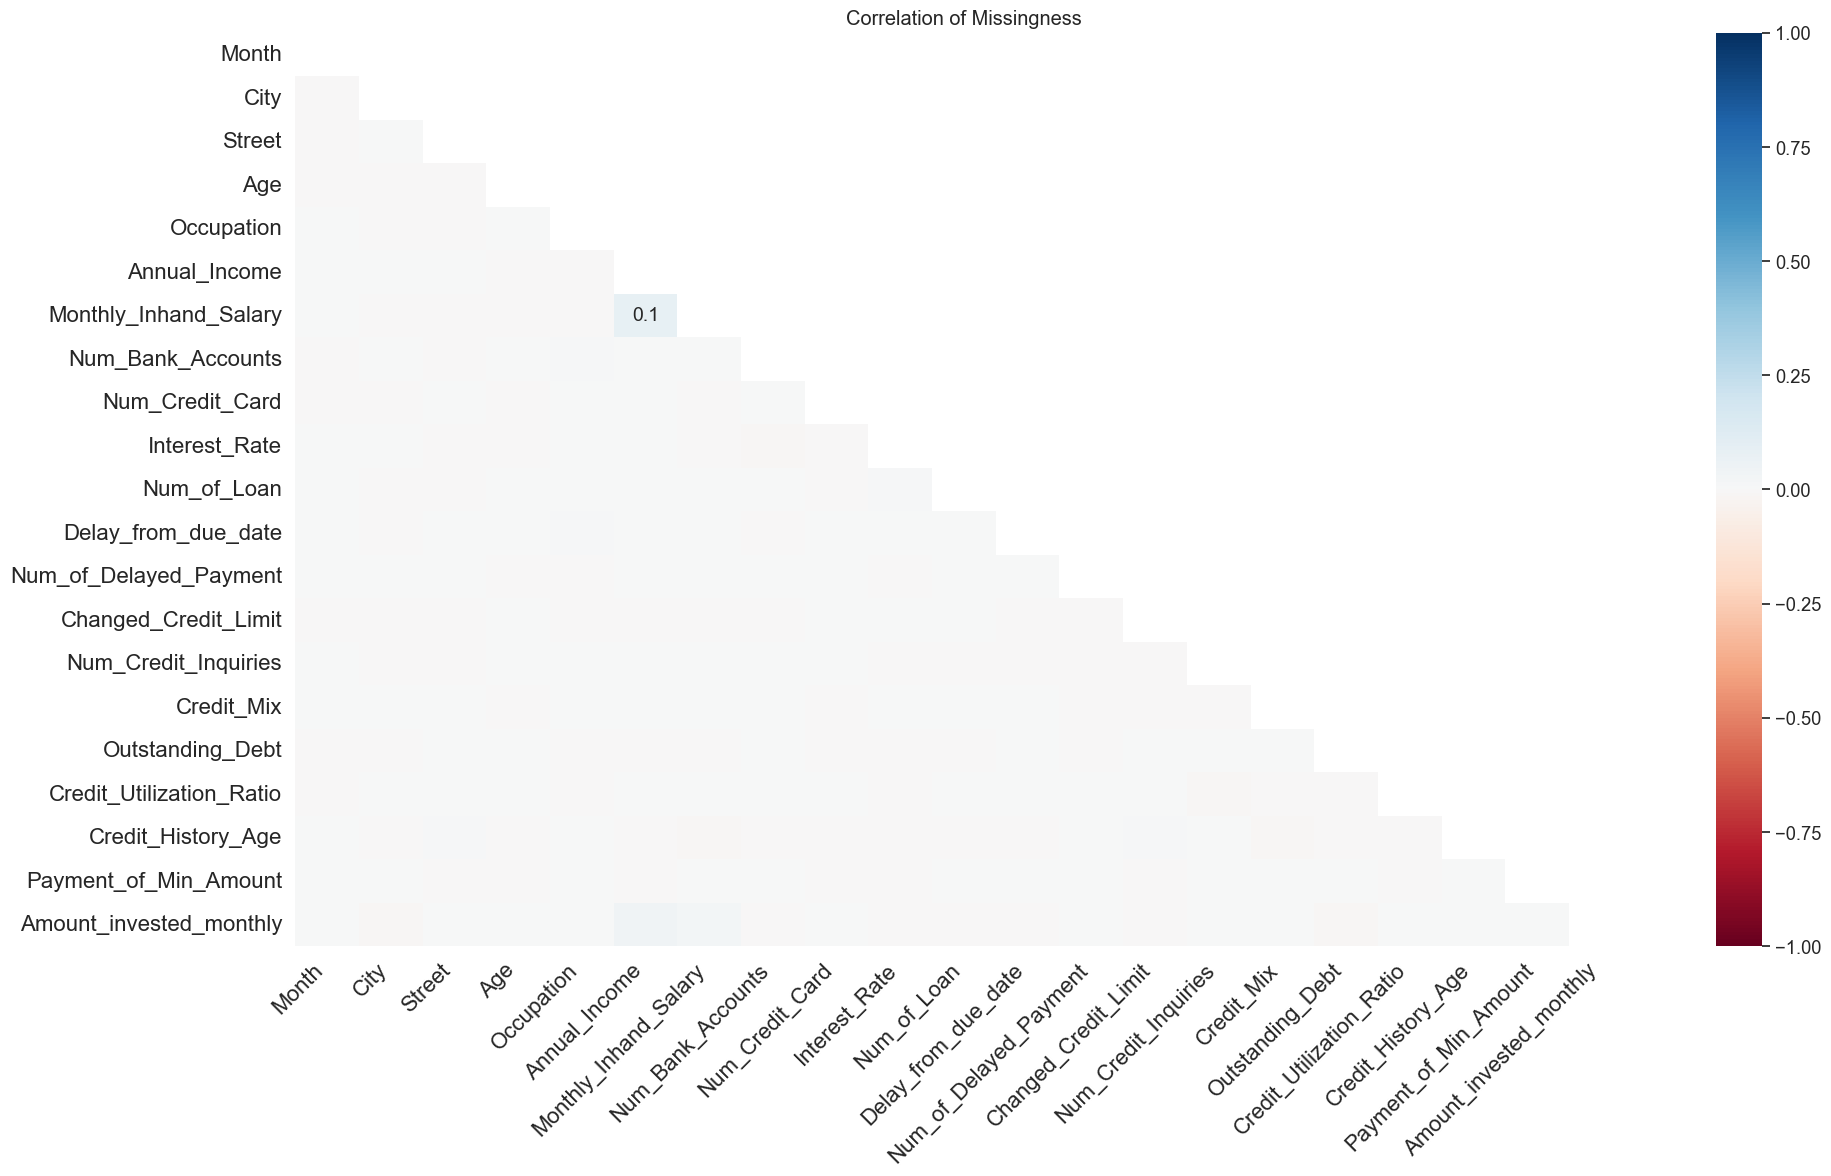

In [385]:
visualize_missing_values(df)

In [386]:
# Check if missing at random (MAR)

missing_columns = get_columns_with_missing_values(df)

mar_evidence = check_missing_at_random(df, missing_columns)

Found 21 columns with missing values

=== ANALYZING MISSING VALUE PATTERNS ===

Analyzing missingness pattern for 'Month' (9938 missing values):

Analyzing missingness pattern for 'City' (9851 missing values):

Analyzing missingness pattern for 'Street' (9920 missing values):

Analyzing missingness pattern for 'Age' (16884 missing values):

Analyzing missingness pattern for 'Occupation' (9944 missing values):

Analyzing missingness pattern for 'Annual_Income' (12587 missing values):

Analyzing missingness pattern for 'Monthly_Inhand_Salary' (25141 missing values):

Analyzing missingness pattern for 'Num_Bank_Accounts' (11037 missing values):

Analyzing missingness pattern for 'Num_Credit_Card' (12103 missing values):

Analyzing missingness pattern for 'Interest_Rate' (11657 missing values):

Analyzing missingness pattern for 'Num_of_Loan' (14088 missing values):

Analyzing missingness pattern for 'Delay_from_due_date' (10521 missing values):

Analyzing missingness pattern for 'Num_of_D

In [387]:
# Split columns by data type
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Filter to only include columns with missing values
numeric_missing = [col for col in numeric_cols if col in missing_columns]
categorical_missing = [col for col in categorical_cols if col in missing_columns]

print(f"\nNumeric columns with missing values ({len(numeric_missing)}): {numeric_missing}")
print(f"Categorical columns with missing values ({len(categorical_missing)}): {categorical_missing}")



Numeric columns with missing values (15): ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly']
Categorical columns with missing values (6): ['Month', 'City', 'Street', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']


In [388]:
# Feature-specific imputation strategies
numeric_strategies = {
    'Outstanding_Debt': 'mice',  # Strong correlations with many variables
    'Amount_invested_monthly': 'mice',  # Strong correlations with income variables
    'Annual_Income': 'median',  # General data
    'Monthly_Inhand_Salary': 'median',
    'Num_Bank_Accounts': 'mode',  # Discrete value, mode is more appropriate
    'Num_Credit_Card': 'mode',  # Discrete value
    'Interest_Rate': 'median',
    'Num_of_Loan': 'mode',  # Discrete value
    'Delay_from_due_date': 'median',
    'Num_of_Delayed_Payment': 'mode',  # Discrete value
    'Changed_Credit_Limit': 'median',
    'Num_Credit_Inquiries': 'mode',  # Discrete value
    'Credit_History_Age': 'median',
    'Credit_Utilization_Ratio': 'median'
}

'''
categorical_strategies = {
    'Month': 'new_category',        # Create "Missing" category
    'City': 'new_category',         # Create "Missing" category
    'Street': 'new_category',       # Create "Missing" category
    'Occupation': 'new_category',   # Create "Missing" category
    'Credit_Mix': 'mode',           # Mode is still appropriate for credit classification
    'Payment_of_Min_Amount': 'mode' # Mode is appropriate for payment behavior
}'''

'\ncategorical_strategies = {\n    \'Month\': \'new_category\',        # Create "Missing" category\n    \'City\': \'new_category\',         # Create "Missing" category\n    \'Street\': \'new_category\',       # Create "Missing" category\n    \'Occupation\': \'new_category\',   # Create "Missing" category\n    \'Credit_Mix\': \'mode\',           # Mode is still appropriate for credit classification\n    \'Payment_of_Min_Amount\': \'mode\' # Mode is appropriate for payment behavior\n}'

In [389]:
df_before_imputing = df.copy()

# In your handle_missing_values function
df = impute_numeric_features(
    df, 
    numeric_missing, 
    feature_strategies=numeric_strategies,
    default_method='median'
)

'''
df = impute_categorical_features(
    df_imputed, 
    categorical_missing, 
    default_method='mode',
    feature_strategies=categorical_strategies
)
'''

Imputing columns ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age'] using 'median' strategy
  Filling Age missing values with median: 33.0000
  Filling Annual_Income missing values with median: 36412.8600
  Filling Monthly_Inhand_Salary missing values with median: 3031.4133
  Filling Interest_Rate missing values with median: 13.0000
  Filling Delay_from_due_date missing values with median: 18.0000
  Filling Changed_Credit_Limit missing values with median: 9.4000
  Filling Credit_Utilization_Ratio missing values with median: 32.3183
  Filling Credit_History_Age missing values with median: 18.2500
  Remaining missing values after median imputation: 0
Imputing columns ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries'] using 'mode' strategy
  Filling Num_Bank_Accounts missing values with mode: 6.0
  Filling Num_Credit_Card m

"\ndf = impute_categorical_features(\n    df_imputed, \n    categorical_missing, \n    default_method='mode',\n    feature_strategies=categorical_strategies\n)\n"


=== IMPUTATION EVALUATION ===

Evaluating imputation for numeric column 'Age':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  83116.000000  100000.000000         20.31
mean      33.340897      33.283340         -0.17
std       10.834842       9.878721         -8.82
min       14.000000      14.000000          0.00
25%       24.000000      26.000000          8.33
50%       33.000000      33.000000          0.00
75%       42.000000      40.000000         -4.76
max      146.000000     146.000000          0.00


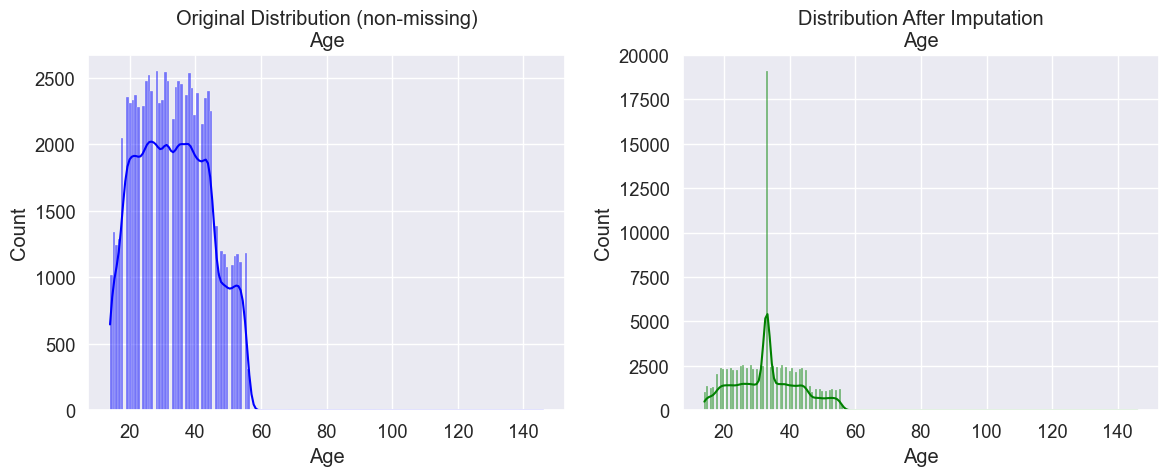


Evaluating imputation for numeric column 'Annual_Income':
  Original vs Imputed Statistics:
            Original        Imputed  Difference %
count   87413.000000  100000.000000         14.40
mean    48320.656524   46821.822176         -3.10
std     35125.406440   33077.128315         -5.83
min      7005.930000    7005.930000          0.00
25%     19200.080000   20394.200000          6.22
50%     36412.860000   36412.860000          0.00
75%     69740.960000   63675.120000         -8.70
max    152574.760000  152574.760000          0.00


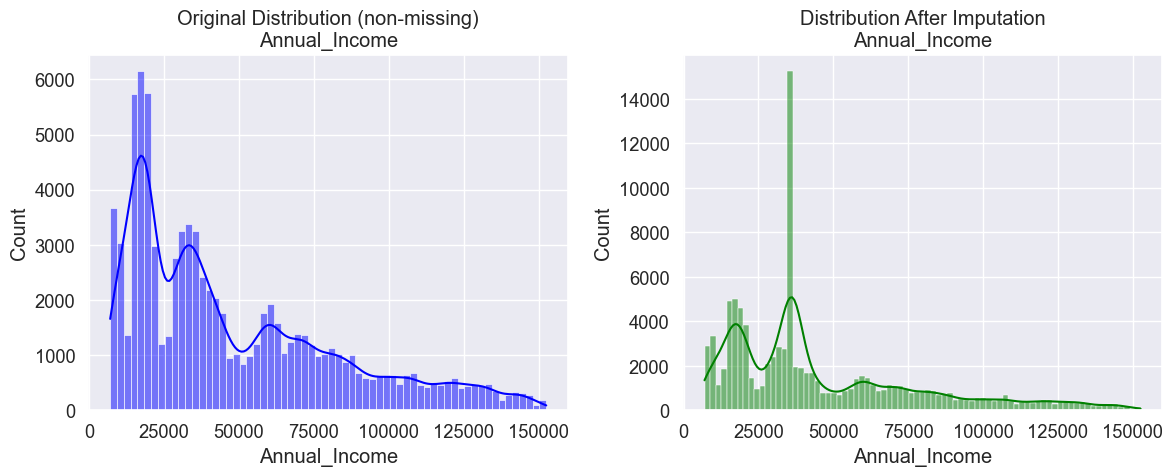


Evaluating imputation for numeric column 'Monthly_Inhand_Salary':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  74859.000000  100000.000000         33.58
mean    3987.534065    3747.155752         -6.03
std     2890.881593    2535.378336        -12.30
min      303.645417     303.645417          0.00
25%     1611.188333    1991.912500         23.63
50%     3031.413333    3031.413333          0.00
75%     5764.542500    4783.657500        -17.02
max    12395.060000   12395.060000          0.00


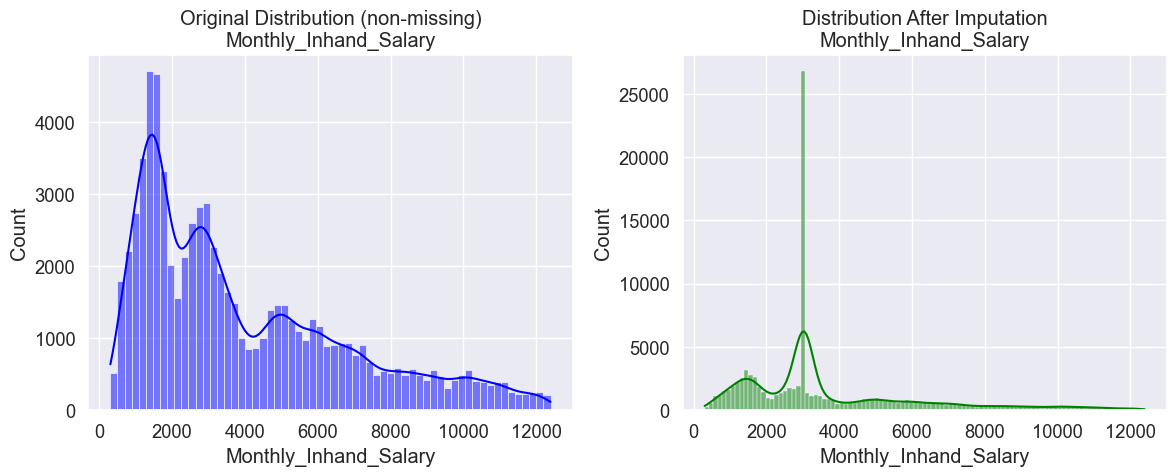


Evaluating imputation for numeric column 'Num_Bank_Accounts':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  88963.000000  100000.000000         12.41
mean       5.371525       5.440890          1.29
std        2.593327       2.453945         -5.37
min        0.000000       0.000000           NaN
25%        3.000000       4.000000         33.33
50%        6.000000       6.000000          0.00
75%        7.000000       7.000000          0.00
max       18.000000      18.000000          0.00


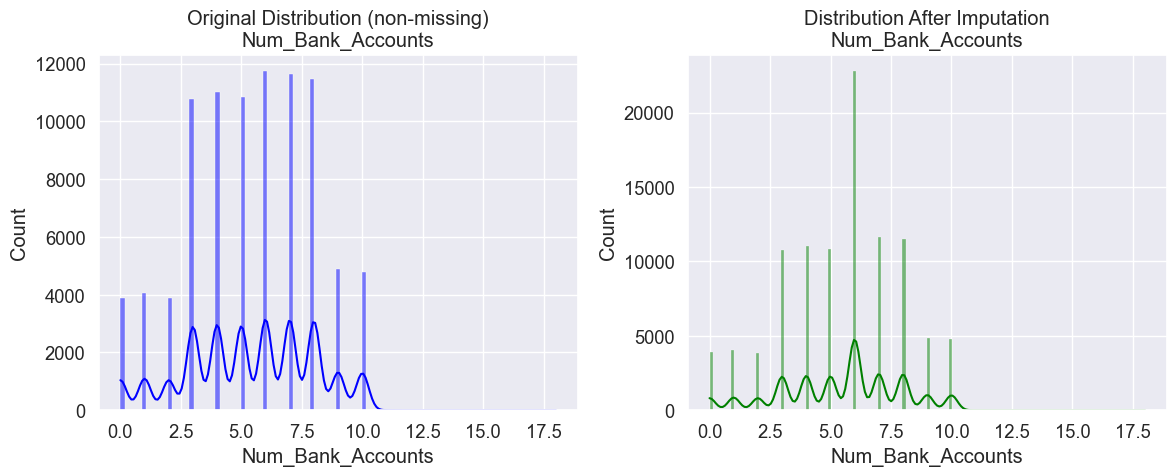


Evaluating imputation for numeric column 'Num_Credit_Card':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  87897.000000  100000.000000         13.77
mean       5.534364       5.469690         -1.17
std        2.069447       1.947989         -5.87
min        0.000000       0.000000           NaN
25%        4.000000       4.000000          0.00
50%        5.000000       5.000000          0.00
75%        7.000000       7.000000          0.00
max       15.000000      15.000000          0.00


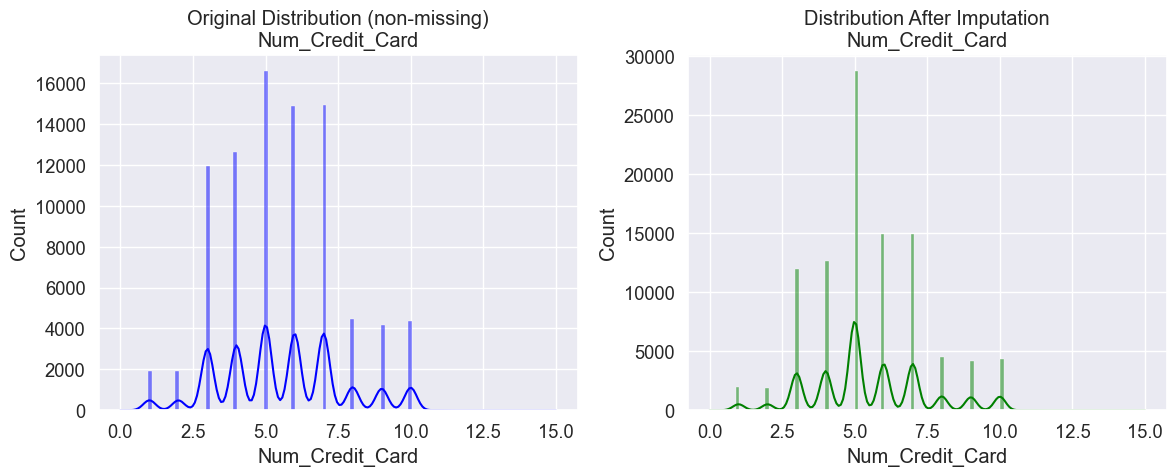


Evaluating imputation for numeric column 'Interest_Rate':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  88343.000000  100000.000000         13.20
mean      14.547389      14.367010         -1.24
std        8.791108       8.277748         -5.84
min        1.000000       1.000000          0.00
25%        7.000000       8.000000         14.29
50%       13.000000      13.000000          0.00
75%       20.000000      19.000000         -5.00
max      100.000000     100.000000          0.00


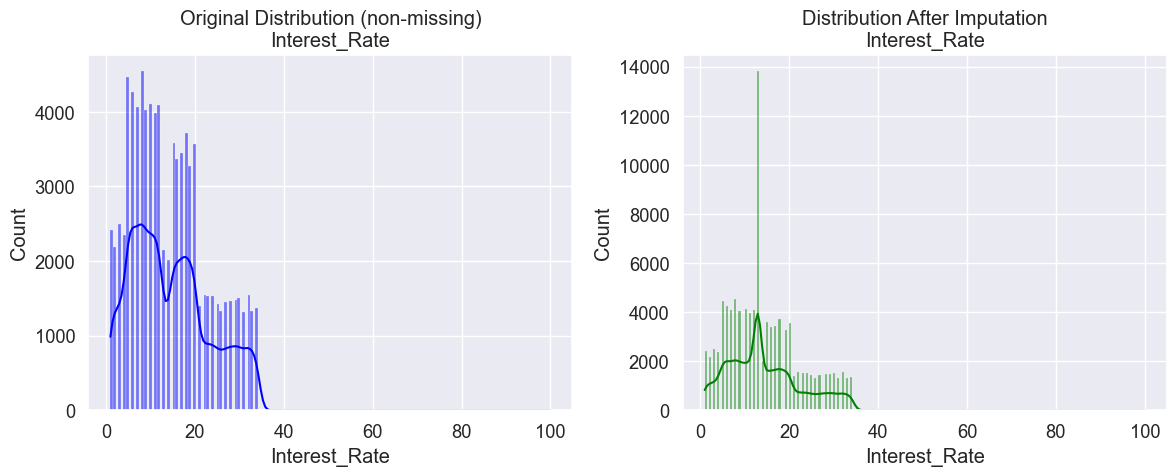


Evaluating imputation for numeric column 'Num_of_Loan':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  85912.000000  100000.000000         16.40
mean       3.533872       3.458660         -2.13
std        2.453619       2.281798         -7.00
min        0.000000       0.000000           NaN
25%        2.000000       2.000000          0.00
50%        3.000000       3.000000          0.00
75%        5.000000       5.000000          0.00
max       23.000000      23.000000          0.00


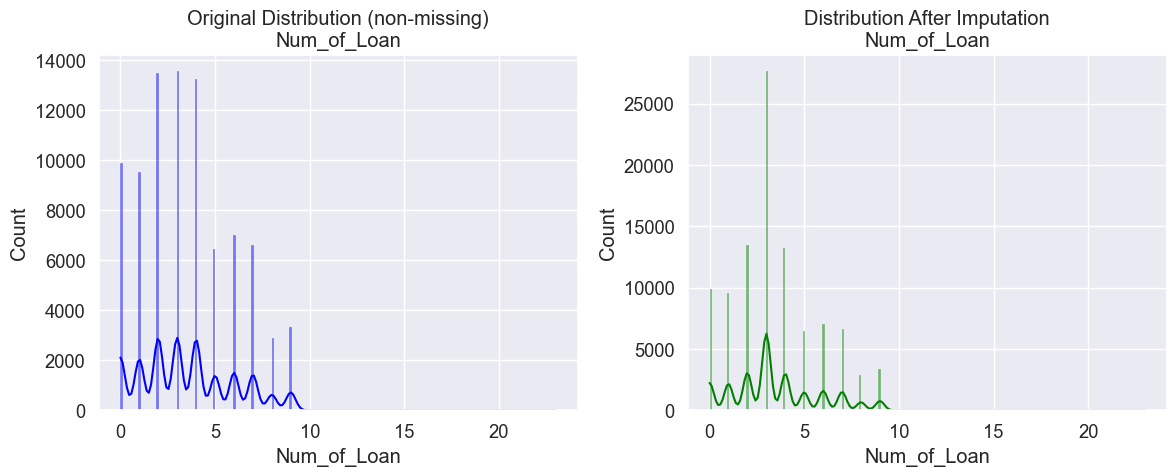


Evaluating imputation for numeric column 'Delay_from_due_date':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  89479.000000  100000.000000         11.76
mean      21.219940      20.881170         -1.60
std       14.797115      14.031901         -5.17
min        0.000000       0.000000           NaN
25%       10.000000      11.000000         10.00
50%       18.000000      18.000000          0.00
75%       28.000000      27.000000         -3.57
max       67.000000      67.000000          0.00


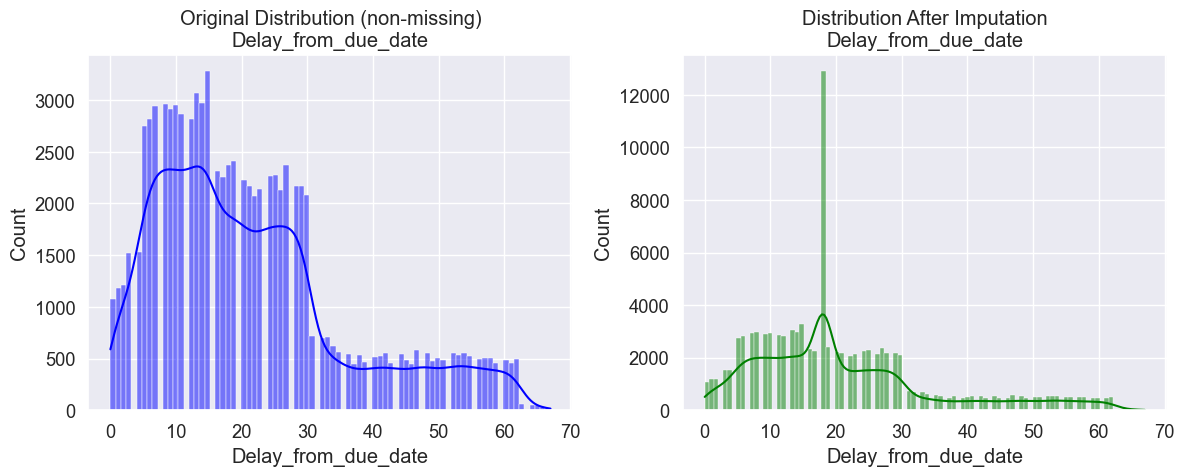


Evaluating imputation for numeric column 'Num_of_Delayed_Payment':
  Original vs Imputed Statistics:
           Original       Imputed  Difference %
count  82631.000000  100000.00000         21.02
mean      13.801007      14.70402          6.54
std       14.496769      13.32416         -8.09
min        0.000000       0.00000           NaN
25%        9.000000      10.00000         11.11
50%       14.000000      16.00000         14.29
75%       18.000000      19.00000          5.56
max      709.000000     709.00000          0.00


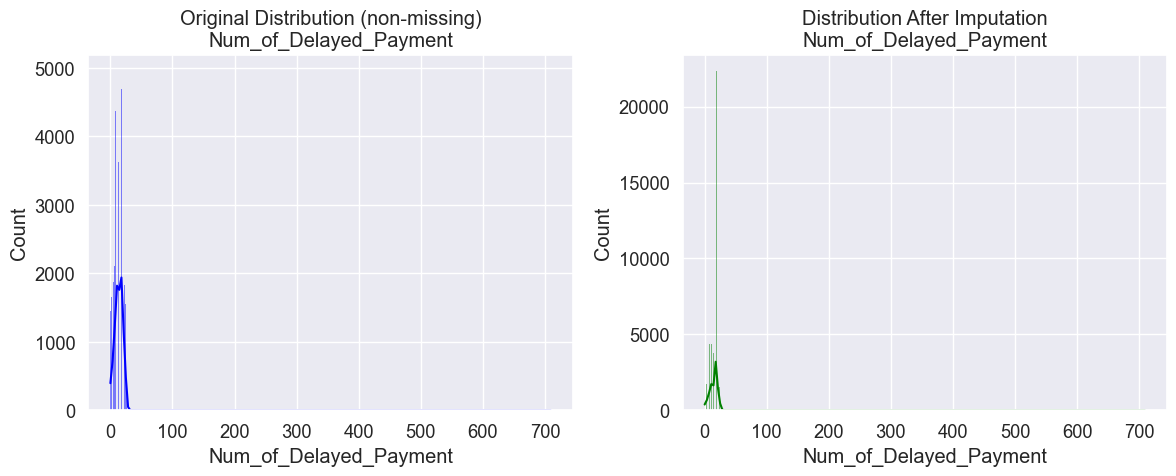


Evaluating imputation for numeric column 'Changed_Credit_Limit':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  87885.000000  100000.000000         13.79
mean      10.345177      10.230669         -1.11
std        6.716509       6.304070         -6.14
min       -6.490000      -6.490000         -0.00
25%        5.320000       6.017500         13.11
50%        9.400000       9.400000          0.00
75%       14.790000      13.590000         -8.11
max       30.720000      30.720000          0.00


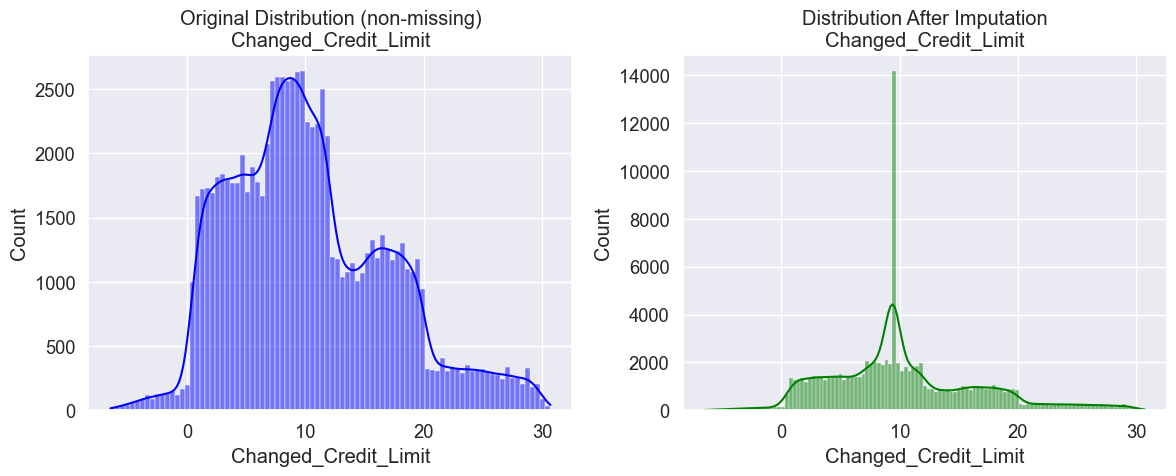


Evaluating imputation for numeric column 'Num_Credit_Inquiries':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  86634.000000  100000.000000         15.43
mean       5.784980       5.546400         -4.12
std        3.879198       3.661388         -5.61
min        0.000000       0.000000           NaN
25%        3.000000       3.000000          0.00
50%        5.000000       4.000000        -20.00
75%        8.000000       8.000000          0.00
max       49.000000      49.000000          0.00


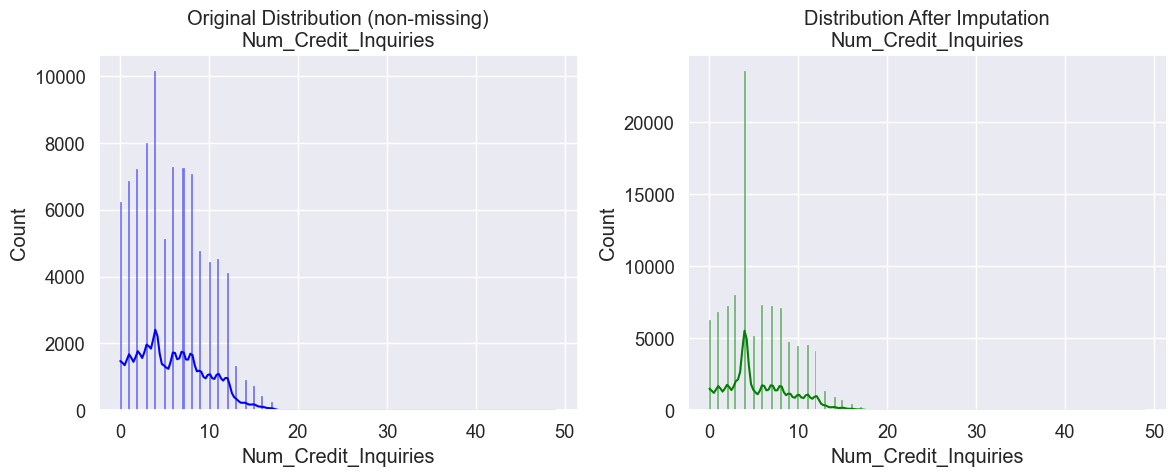


Evaluating imputation for numeric column 'Outstanding_Debt':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  85270.000000  100000.000000         17.27
mean    1253.374376    1315.404261          4.95
std      916.431286     913.024057         -0.37
min        0.230000    -229.606579     -99928.95
25%      539.740000     590.300000          9.37
50%     1101.260000    1163.330000          5.64
75%     1686.570000    1918.639942         13.76
max     4006.340000    4006.340000          0.00


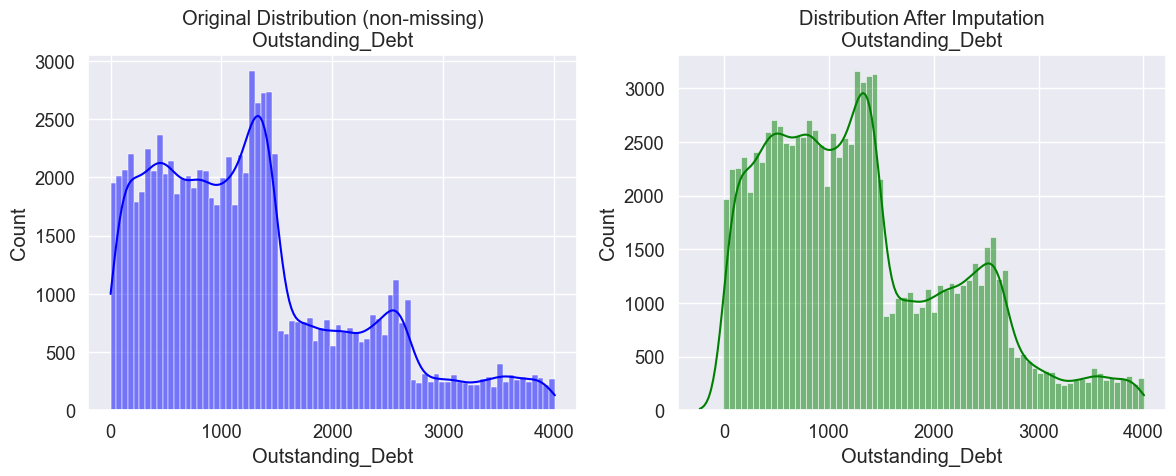


Evaluating imputation for numeric column 'Credit_Utilization_Ratio':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  90025.000000  100000.000000         11.08
mean      32.290967      32.293692          0.01
std        5.114670       4.852880         -5.12
min       20.100770      20.100770          0.00
25%       28.064418      28.543863          1.71
50%       32.318280      32.318280          0.00
75%       36.502272      36.037140         -1.27
max       50.000000      50.000000          0.00


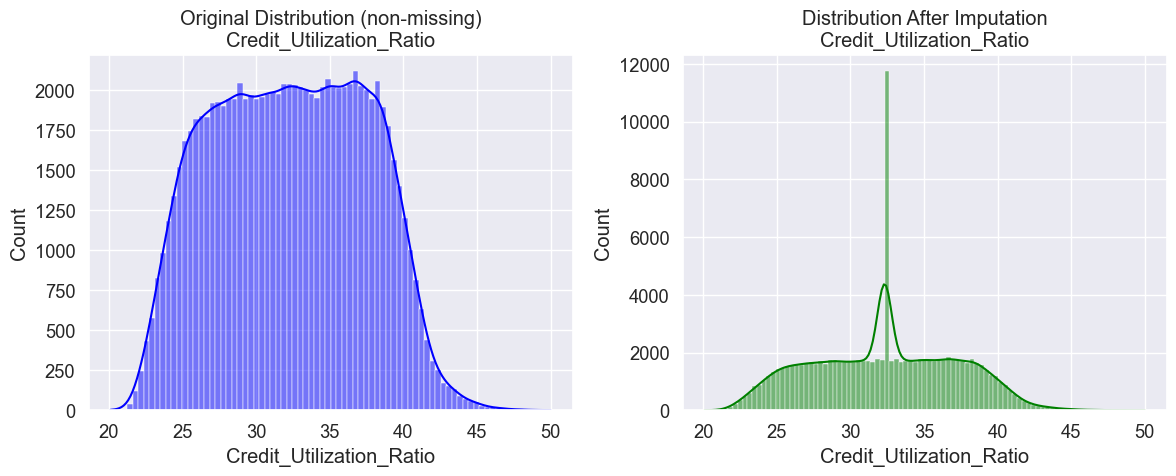


Evaluating imputation for numeric column 'Credit_History_Age':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  81791.000000  100000.000000         22.26
mean      18.429578      18.396878         -0.18
std        8.311059       7.516698         -9.56
min        0.083333       0.083333          0.00
25%       12.000000      13.750000         14.58
50%       18.250000      18.250000          0.00
75%       25.166667      23.333333         -7.28
max       33.666667      33.666667          0.00


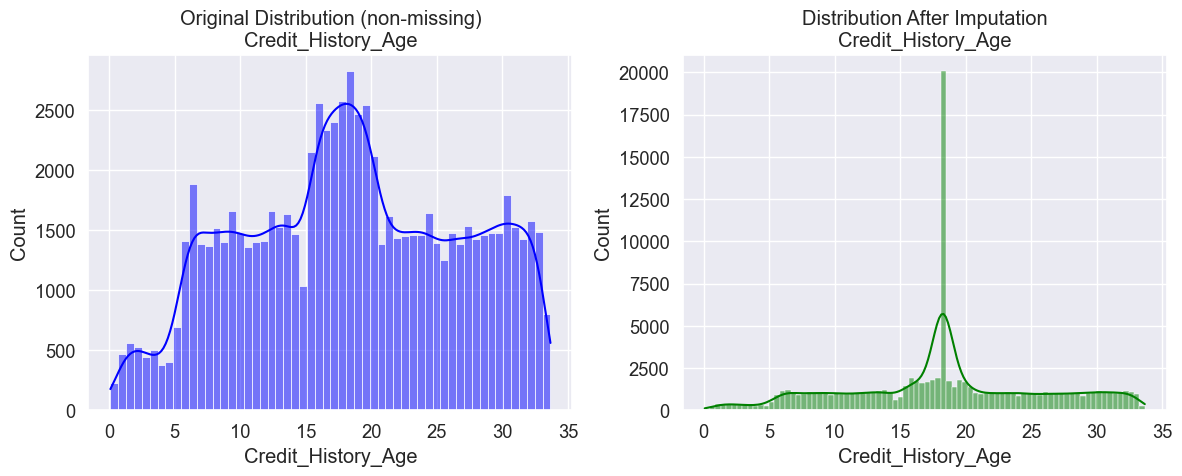


Evaluating imputation for numeric column 'Amount_invested_monthly':
  Original vs Imputed Statistics:
           Original        Imputed  Difference %
count  75172.000000  100000.000000         33.03
mean     147.079113     153.487419          4.36
std      104.657615      96.802823         -7.51
min        0.000000       0.000000           NaN
25%       68.077205      82.051383         20.53
50%      117.907766     132.581008         12.44
75%      197.343820     203.942730          3.34
max      482.764321     482.764321          0.00


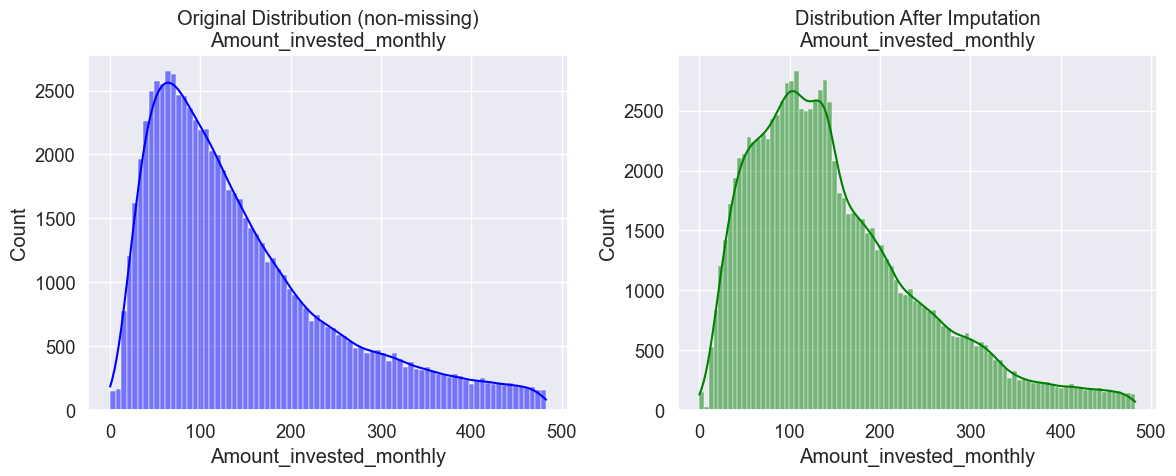


Evaluating imputation for categorical column 'Month':
  Original vs Imputed Top Categories (%):
          Original %  Imputed %
Month                          
April         11.319     11.319
May           11.318     11.318
June          11.283     11.283
February      11.247     11.247
July          11.244     11.244
January       11.237     11.237
August        11.223     11.223
March         11.191     11.191
NaN            9.938      9.938


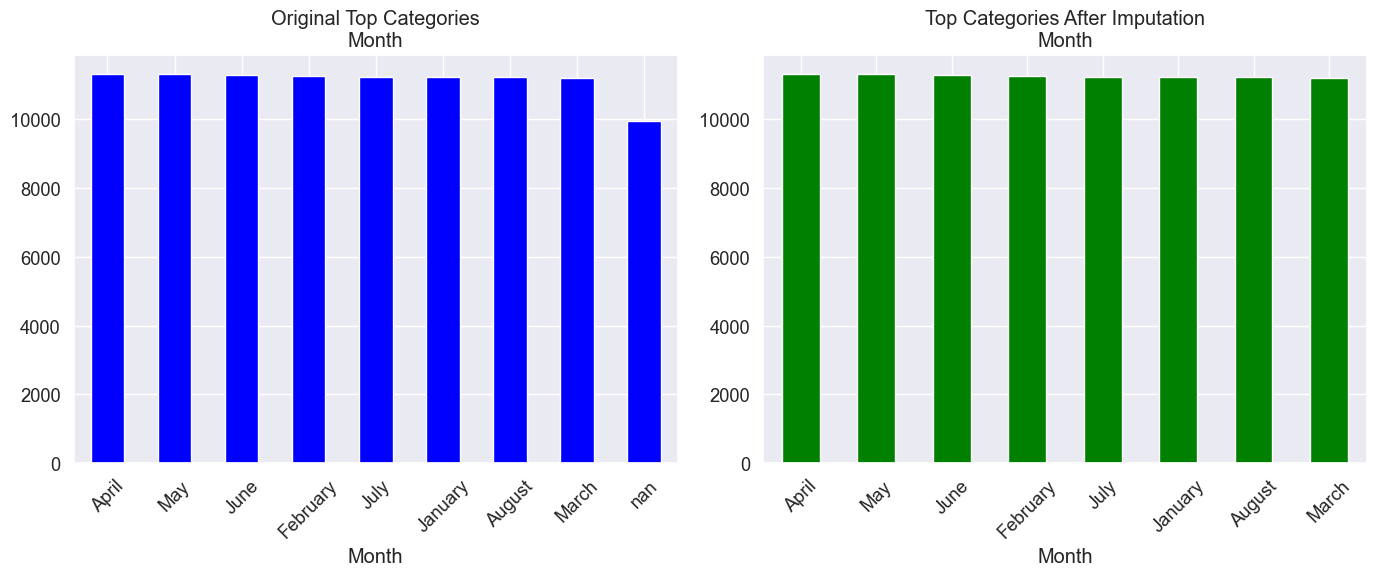


Evaluating imputation for categorical column 'City':
  Original vs Imputed Top Categories (%):
              Original %  Imputed %
City                               
Standhampton      47.744     47.744
BadShire          26.066     26.066
Lonton            16.024     16.024
NaN                9.851      9.851
ZeroVille          0.315      0.315


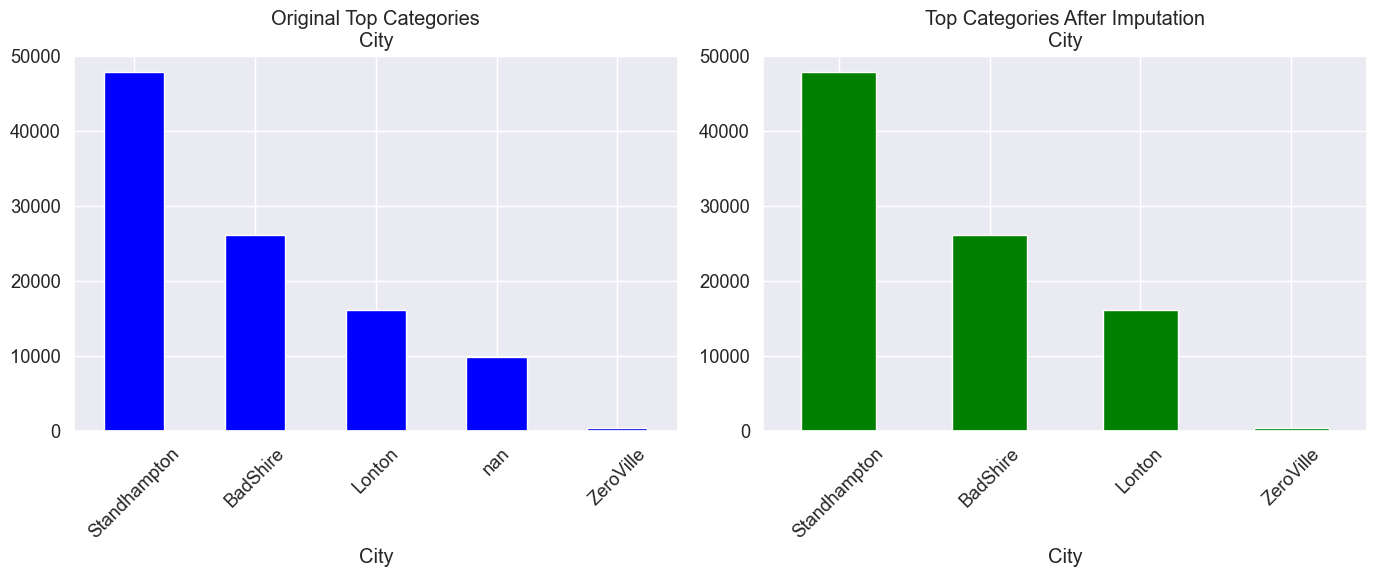


Evaluating imputation for categorical column 'Street':
  Original vs Imputed Top Categories (%):
                Original %  Imputed %
Street                               
NaN                  9.920      9.920
Quality Street       5.343      5.343
Memory Street        5.168      5.168
Fleet Street         5.151      5.151
High Street          5.052      5.052
Jubilee Street       4.998      4.998
Old Street           4.960      4.960
Grove Street         4.881      4.881
New Street           4.851      4.851
Pine Street          4.835      4.835


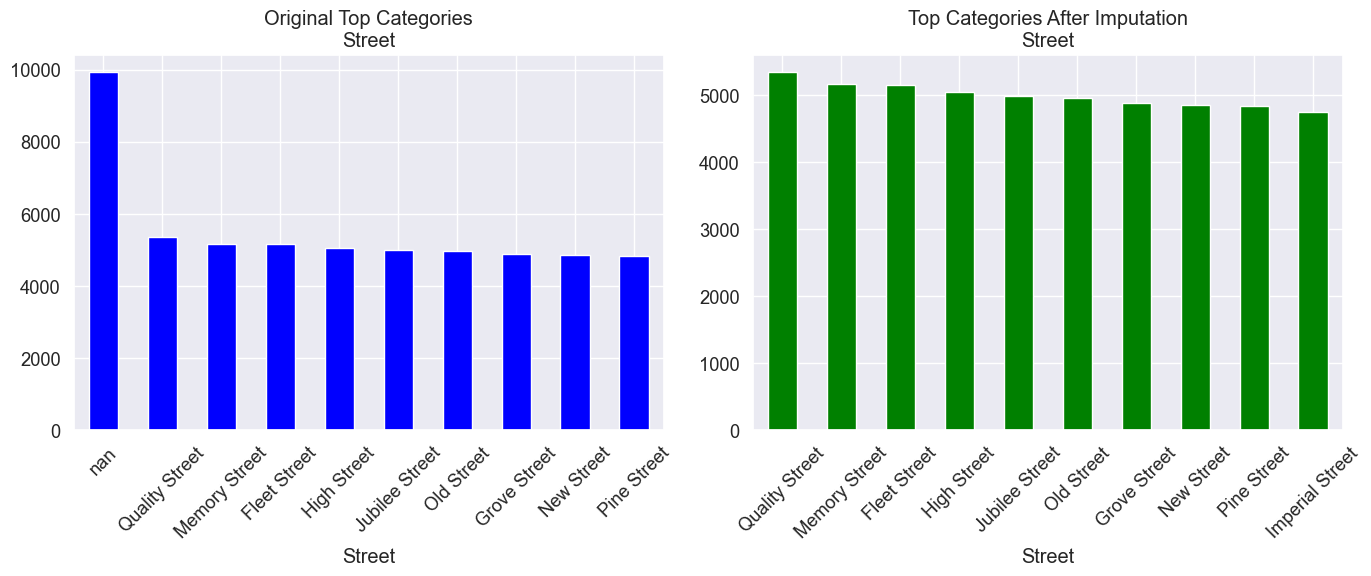


Evaluating imputation for categorical column 'Occupation':
  Original vs Imputed Top Categories (%):
            Original %  Imputed %
Occupation                       
Journalist      17.002     17.002
Architect       16.576     16.576
Teacher         16.397     16.397
NaN              9.944      9.944
Cleaner          3.418      3.418
Musician         3.384      3.384
Artist           3.360      3.360
Unemployed       3.178      3.178
Mechanic         3.160      3.160
Writer           3.125      3.125


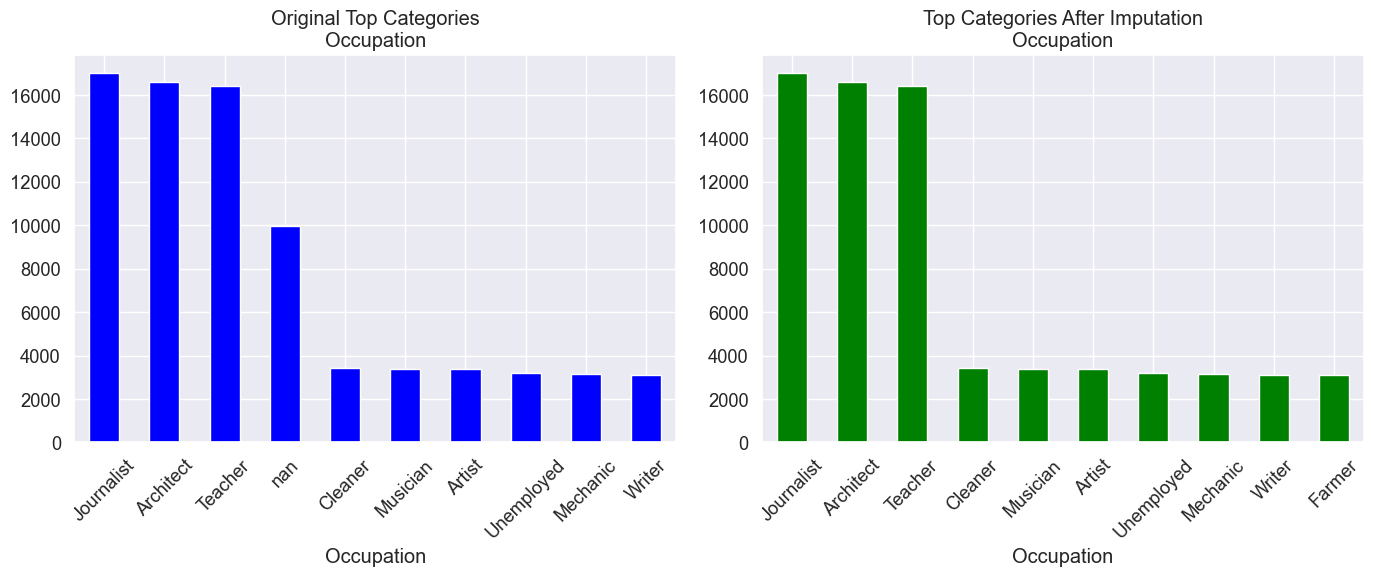


Evaluating imputation for categorical column 'Credit_Mix':
  Original vs Imputed Top Categories (%):
               Original %  Imputed %
Credit_Mix                          
Standard           32.875     32.875
Good               21.915     21.915
No Credit Mix      18.210     18.210
Bad                17.085     17.085
NaN                 9.915      9.915


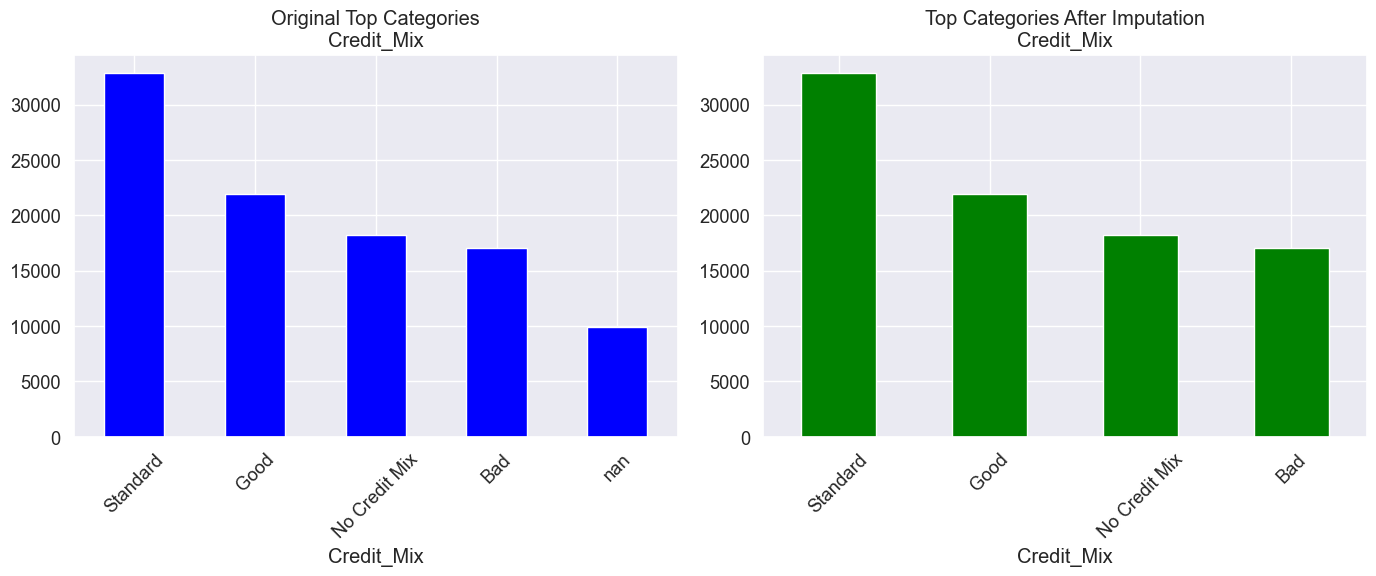


Evaluating imputation for categorical column 'Payment_of_Min_Amount':
  Original vs Imputed Top Categories (%):
                       Original %  Imputed %
Payment_of_Min_Amount                       
Yes                        47.204     47.204
No                         32.024     32.024
NM                         10.815     10.815
NaN                         9.957      9.957


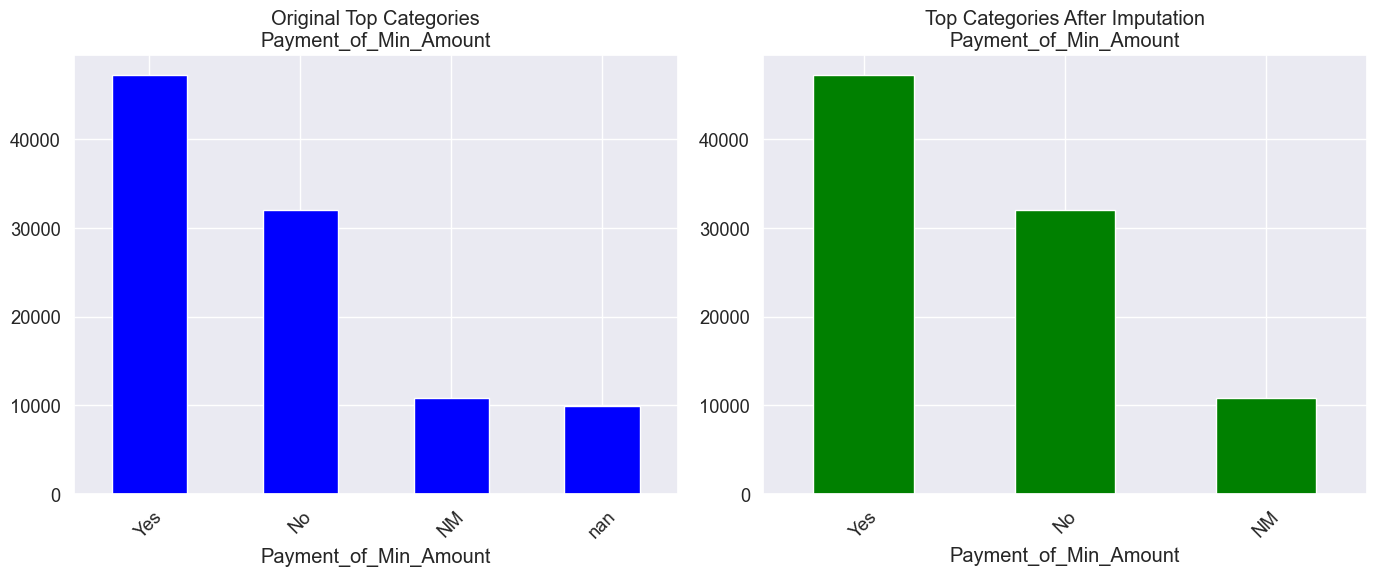


=== MISSING VALUES HANDLING COMPLETE ===
Original missing values: 284135
Remaining missing values: 59525


In [390]:
# 6. Evaluate imputation
evaluate_imputation(df_before_imputing, df, numeric_missing, categorical_missing)

# 7. Final report
print("\n=== MISSING VALUES HANDLING COMPLETE ===")
print(f"Original missing values: {df_before_imputing.isnull().sum().sum()}")
print(f"Remaining missing values: {df.isnull().sum().sum()}")


### Analysis Categorical Features


--------------------------------------------------
Analysis of Month
--------------------------------------------------
Total records: 100000
Missing values: 9938 (9.94%)
Unique categories: 9

Category Distribution:
Category             Count      Percentage
----------------------------------------
April                11319      11.32%
May                  11318      11.32%
June                 11283      11.28%
February             11247      11.25%
July                 11244      11.24%
January              11237      11.24%
August               11223      11.22%
March                11191      11.19%
Missing              9938       9.94%


c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\categorical_features_handling.py:643: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_counts.index, y=plot_counts.values, palette=colors)


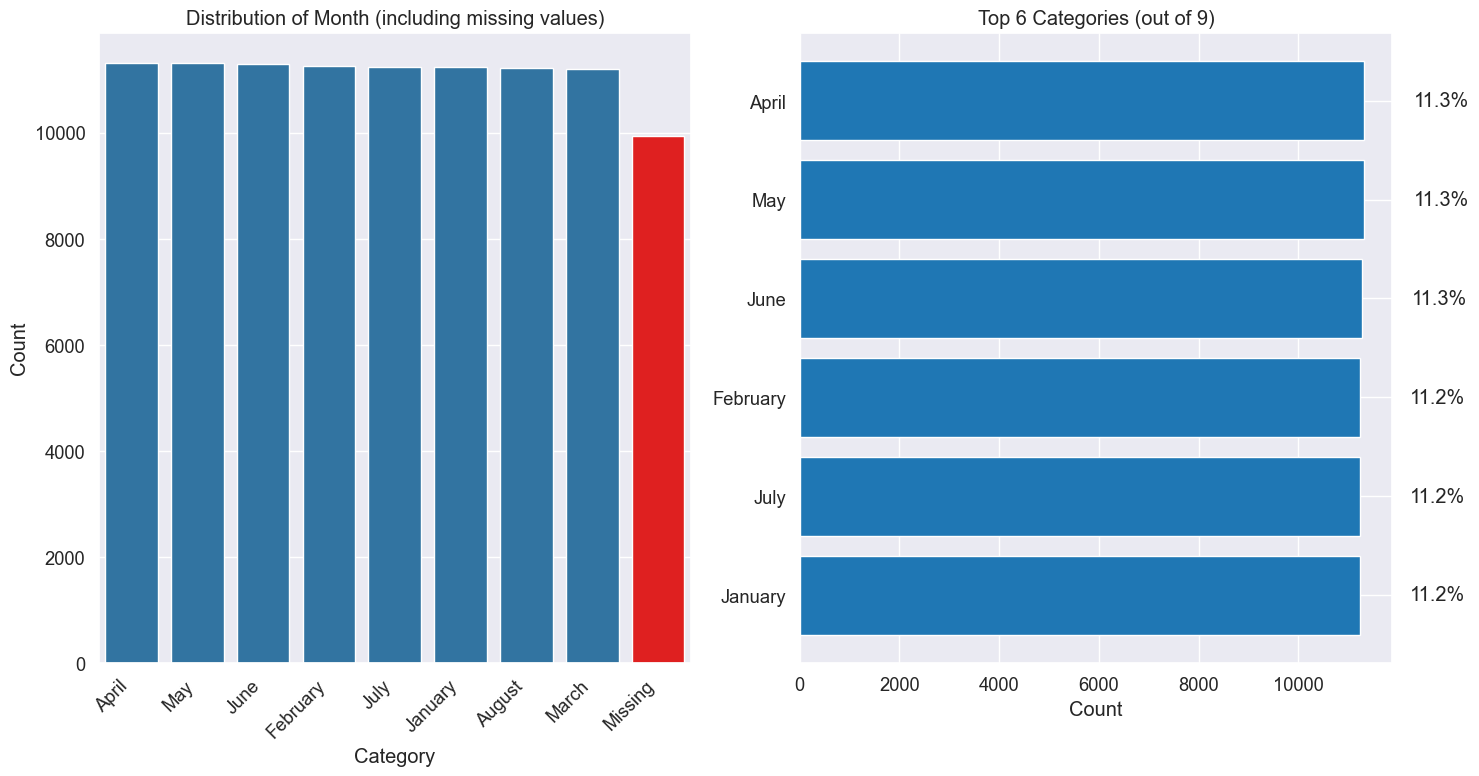


--------------------------------------------------
Analysis of Occupation
--------------------------------------------------
Total records: 100000
Missing values: 9944 (9.94%)
Unique categories: 22

Category Distribution:
Category             Count      Percentage
----------------------------------------
Journalist           17002      17.00%
Architect            16576      16.58%
Teacher              16397      16.40%
Missing              9944       9.94%
Cleaner              3418       3.42%
Musician             3384       3.38%
Artist               3360       3.36%
Unemployed           3178       3.18%
Mechanic             3160       3.16%
Writer               3125       3.12%
Farmer               3083       3.08%
Student              3065       3.06%
Scientist            1826       1.83%
Engineer             1723       1.72%
Media_Manager        1630       1.63%
Entrepreneur         1623       1.62%
Doctor               1619       1.62%
Manager              1588       1.59%
Accoun

c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\categorical_features_handling.py:643: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_counts.index, y=plot_counts.values, palette=colors)


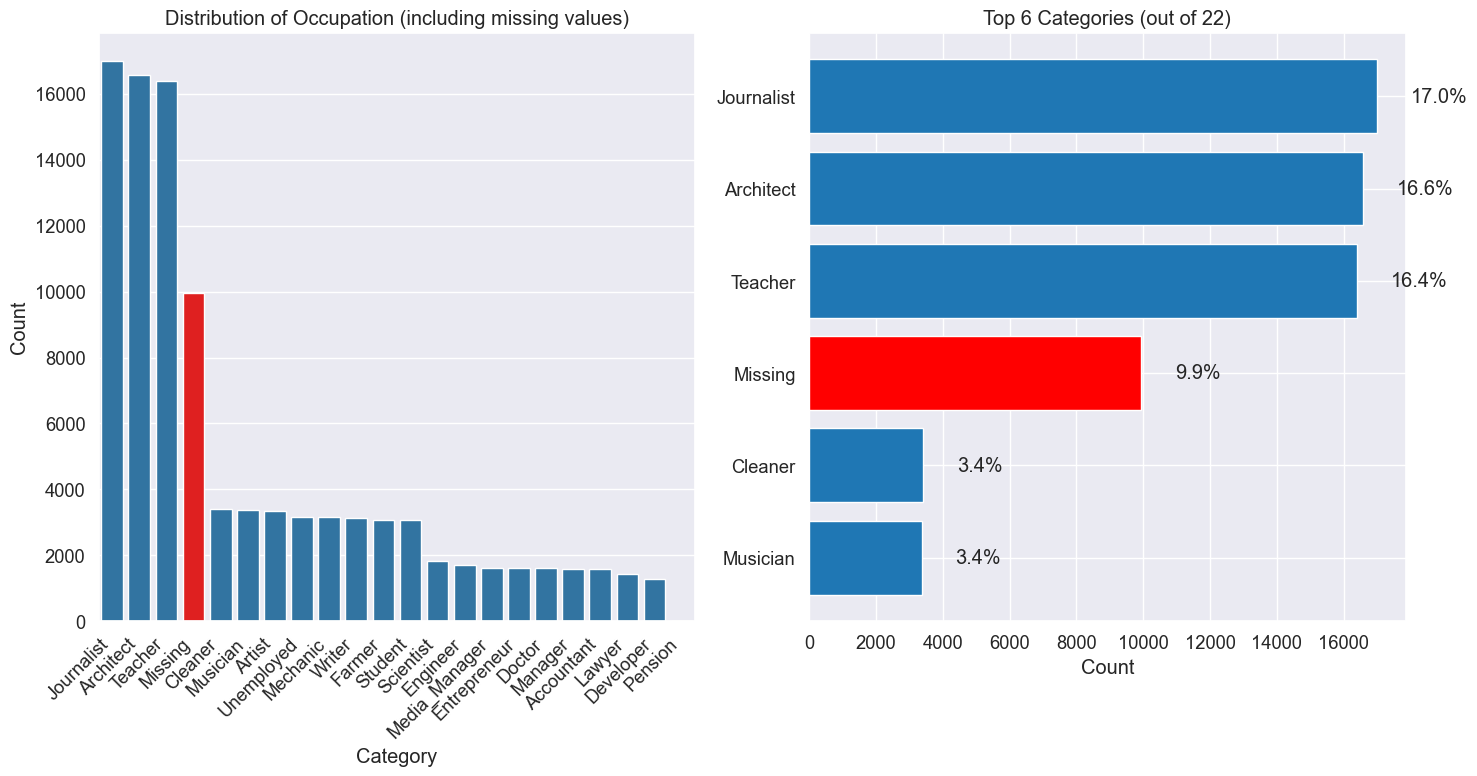


--------------------------------------------------
Analysis of City
--------------------------------------------------
Total records: 100000
Missing values: 9851 (9.85%)
Unique categories: 5

Category Distribution:
Category             Count      Percentage
----------------------------------------
Standhampton         47744      47.74%
BadShire             26066      26.07%
Lonton               16024      16.02%
Missing              9851       9.85%
ZeroVille            315        0.32%


c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\categorical_features_handling.py:643: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_counts.index, y=plot_counts.values, palette=colors)


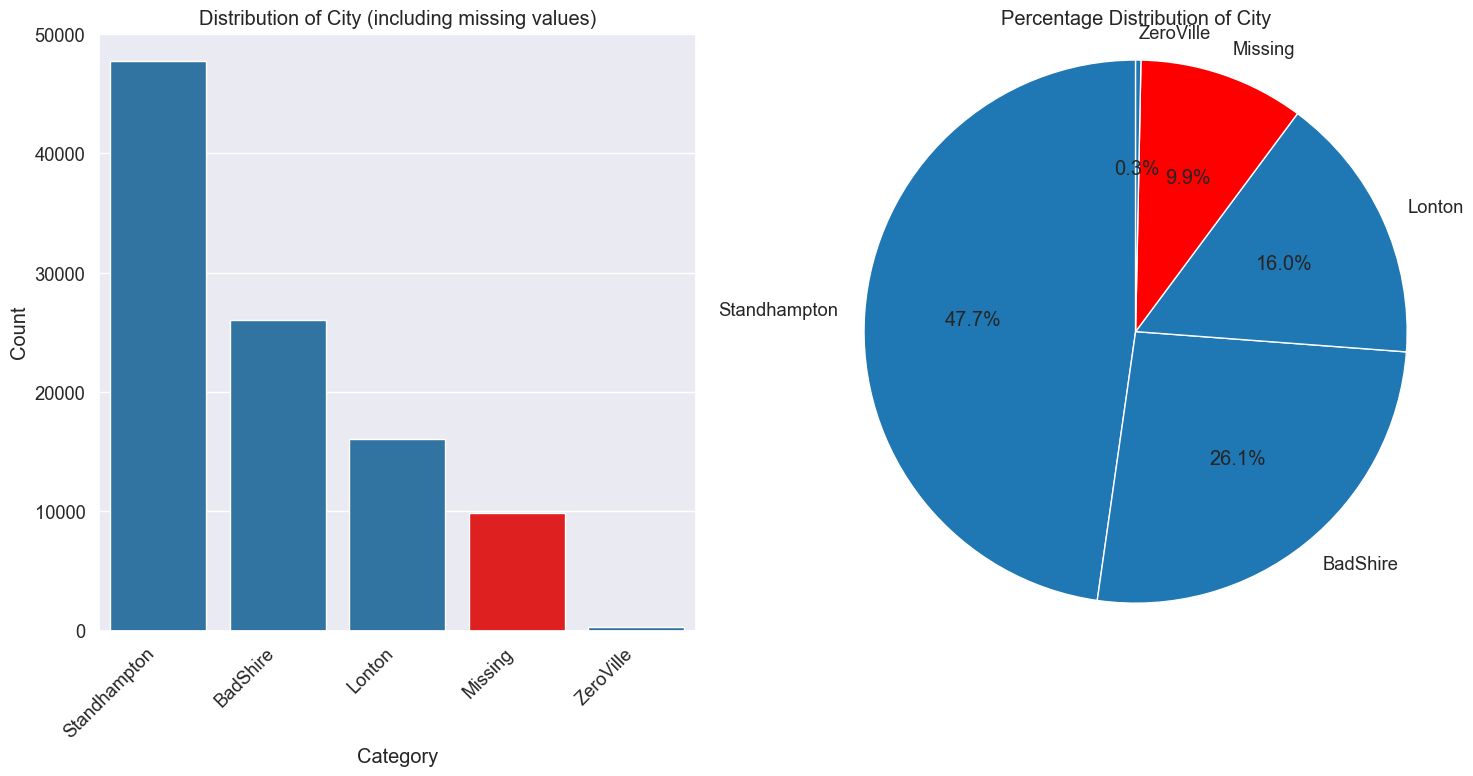


--------------------------------------------------
Analysis of Payment_of_Min_Amount
--------------------------------------------------
Total records: 100000
Missing values: 9957 (9.96%)
Unique categories: 4

Category Distribution:
Category             Count      Percentage
----------------------------------------
Yes                  47204      47.20%
No                   32024      32.02%
NM                   10815      10.81%
Missing              9957       9.96%


c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\categorical_features_handling.py:643: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_counts.index, y=plot_counts.values, palette=colors)


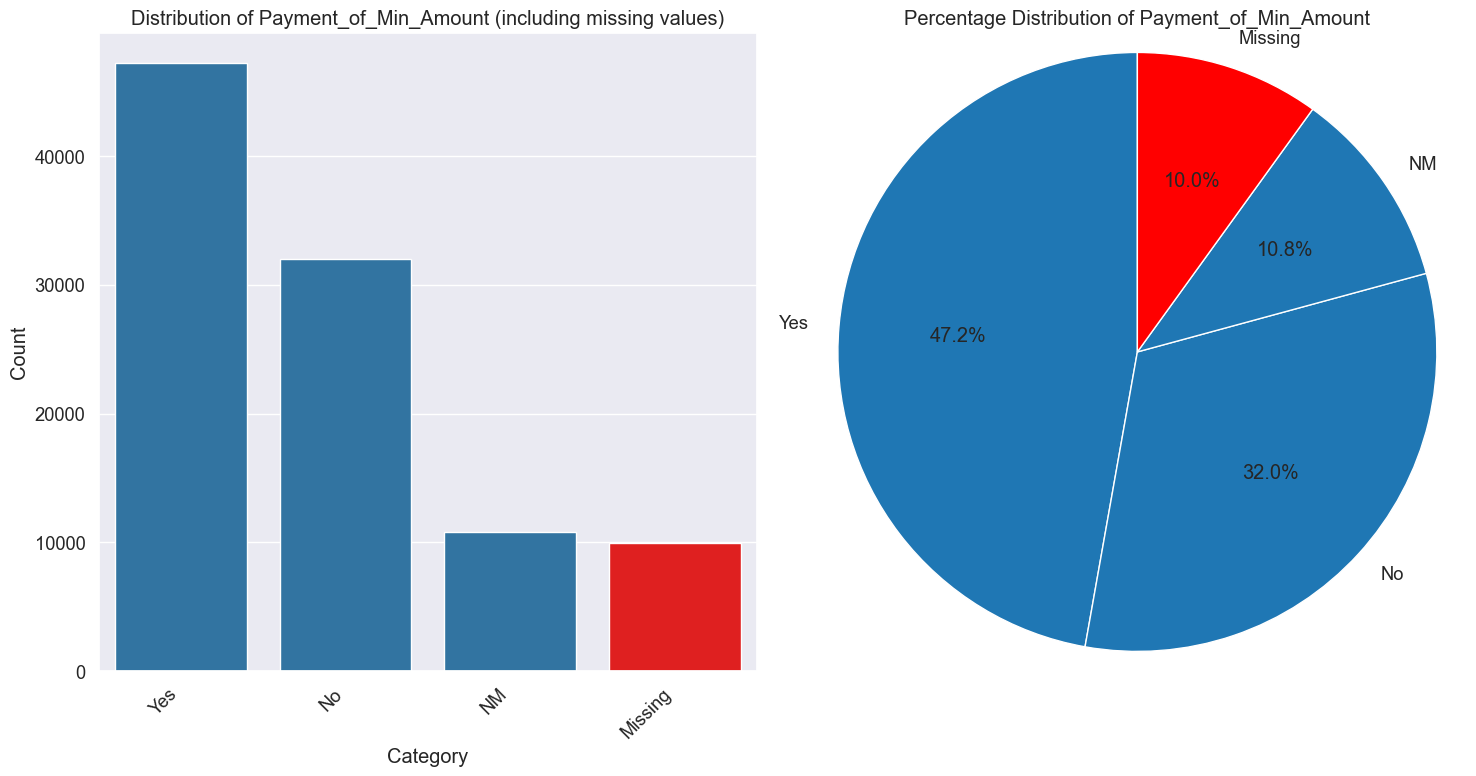


--------------------------------------------------
Analysis of Street
--------------------------------------------------
Total records: 100000
Missing values: 9920 (9.92%)
Unique categories: 32

Category Distribution:
Category             Count      Percentage
----------------------------------------
Missing              9920       9.92%
Quality Street       5343       5.34%
Memory Street        5168       5.17%
Fleet Street         5151       5.15%
High Street          5052       5.05%
Jubilee Street       4998       5.00%
Old Street           4960       4.96%
Grove Street         4881       4.88%
New Street           4851       4.85%
Pine Street          4835       4.83%
Imperial Street      4756       4.76%
King Street          2760       2.76%
Park Street          2730       2.73%
Lombard Street       2662       2.66%
South Street         2604       2.60%
Trafalgar Street     2598       2.60%
North Street         2567       2.57%
Main Street          2531       2.53%
Queen Street 

c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\categorical_features_handling.py:643: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_counts.index, y=plot_counts.values, palette=colors)


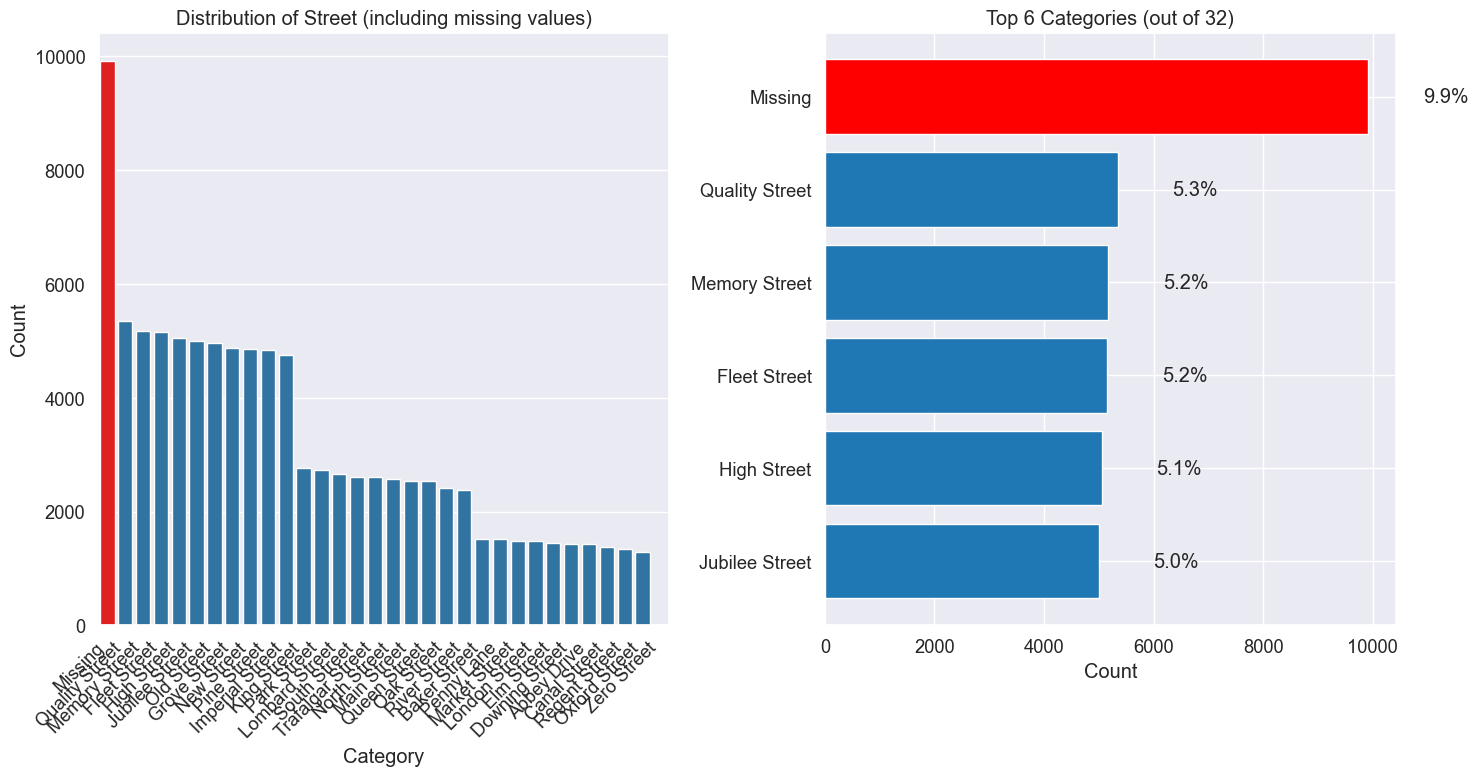


--------------------------------------------------
Analysis of Credit_Mix
--------------------------------------------------
Total records: 100000
Missing values: 9915 (9.92%)
Unique categories: 5

Category Distribution:
Category             Count      Percentage
----------------------------------------
Standard             32875      32.88%
Good                 21915      21.92%
No Credit Mix        18210      18.21%
Bad                  17085      17.09%
Missing              9915       9.92%


c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\categorical_features_handling.py:643: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_counts.index, y=plot_counts.values, palette=colors)


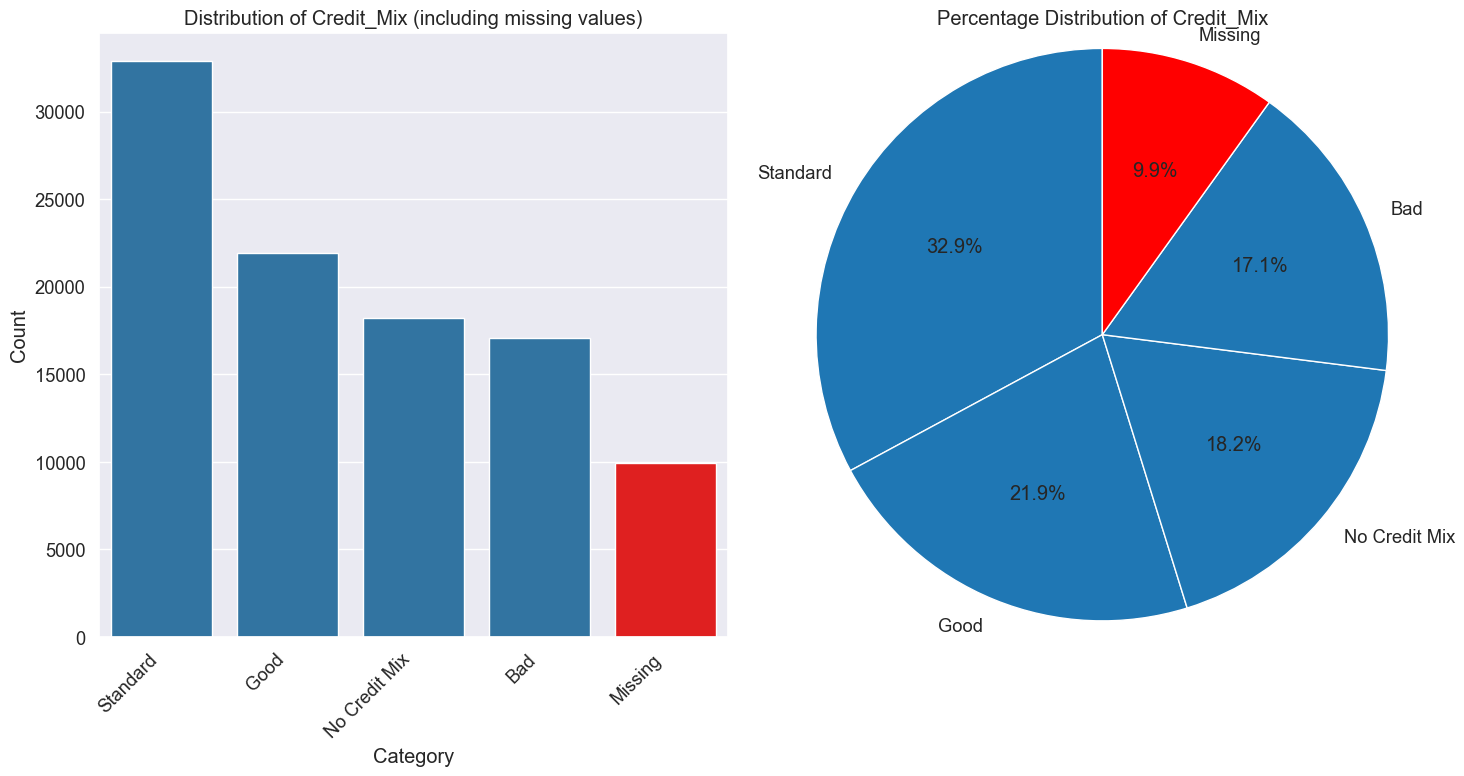

In [391]:
# Analysis of Categorical Features
for feature in categorical_features:
    analyze_categorical_feature(df, feature)

### Handling Missing values for Categorical features

MISSING DATA ANALYSIS

Missing Data Summary (columns with missing values):
                       Missing Count  Missing Percent
Payment_of_Min_Amount           9957            9.957
Occupation                      9944            9.944
Month                           9938            9.938
Street                          9920            9.920
Credit_Mix                      9915            9.915
City                            9851            9.851


<Figure size 1200x400 with 0 Axes>

c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


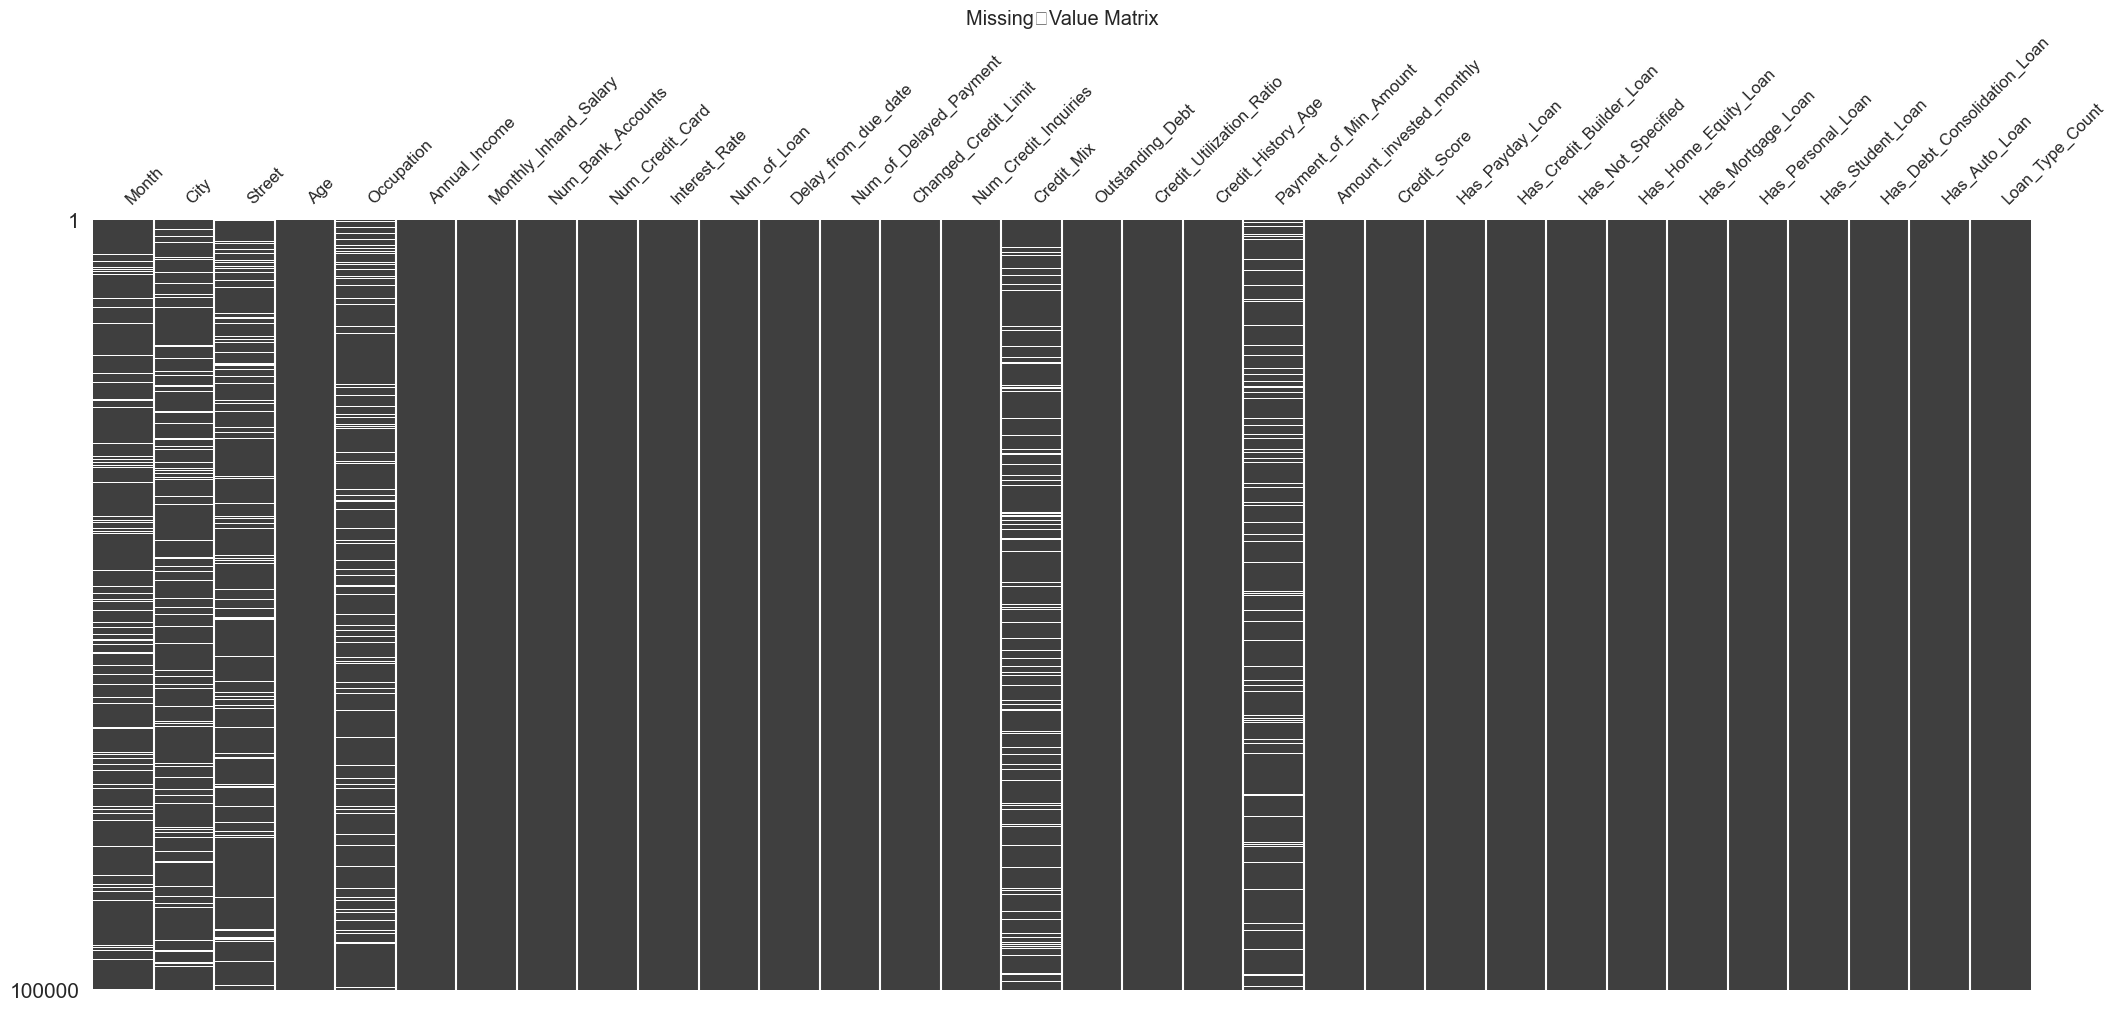

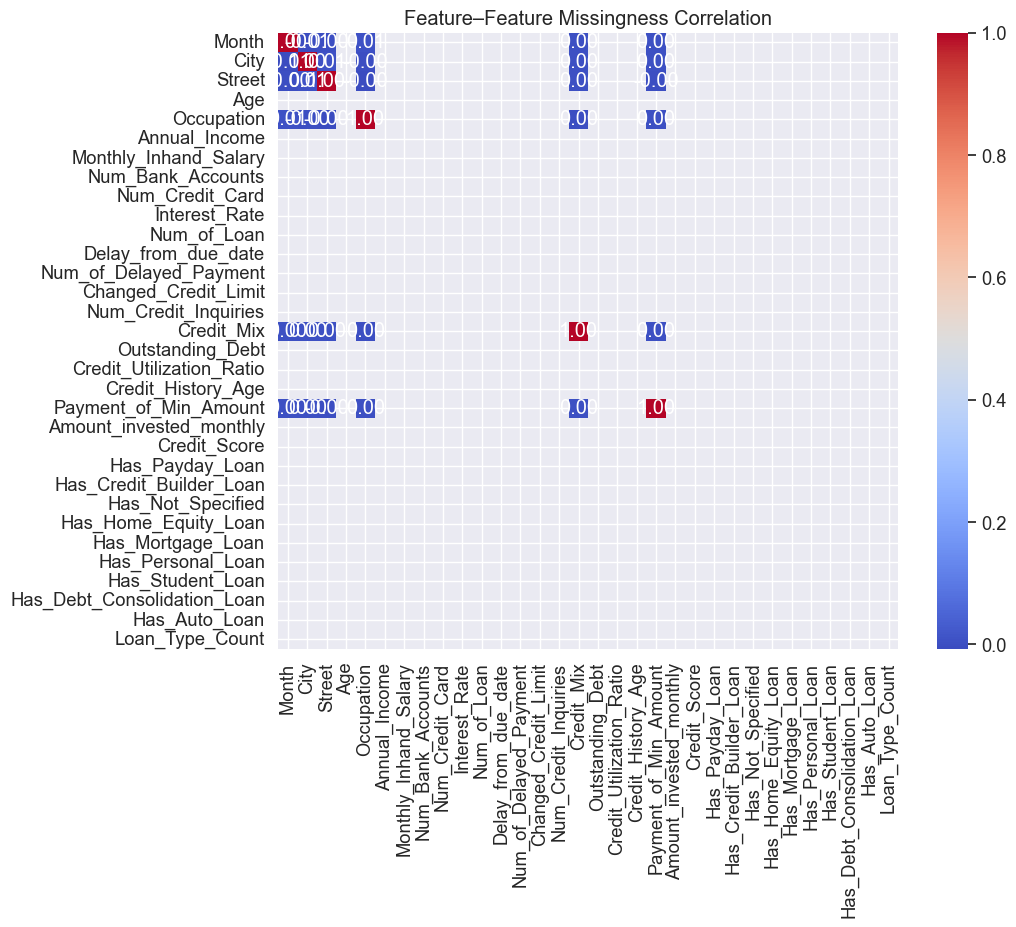


MAR Testing (relationships between missingness and observed values):

Columns with evidence of MAR (Missing At Random):

  Month - Evidence of MAR:
  Categorical variables that predict missingness:
    * City: Relationship with missingness (p=0.0413, effect size=0.01)
  Recommended approach: Use City as predictors in imputation

  City - Evidence of MAR:
  Numeric variables that predict missingness:
    * Credit_History_Age: 1.2% lower when City is missing (p=0.0049)
    * Num_of_Delayed_Payment: 2.2% lower when City is missing (p=0.0198)
    * Amount_invested_monthly: 1.5% lower when City is missing (p=0.0247)
  Categorical variables that predict missingness:
    * Payment_of_Min_Amount: Relationship with missingness (p=0.0062, effect size=0.01)
    * Street: Relationship with missingness (p=0.0175, effect size=0.02)
  Recommended approach: Use Credit_History_Age, Num_of_Delayed_Payment, Amount_invested_monthly as predictors in imputation

  Street - Evidence of MAR:
  Categorical va

{'missing_summary':                              Missing Count  Missing Percent
 Payment_of_Min_Amount                 9957            9.957
 Occupation                            9944            9.944
 Month                                 9938            9.938
 Street                                9920            9.920
 Credit_Mix                            9915            9.915
 City                                  9851            9.851
 Monthly_Inhand_Salary                    0            0.000
 Age                                      0            0.000
 Num_Bank_Accounts                        0            0.000
 Num_Credit_Card                          0            0.000
 Num_of_Loan                              0            0.000
 Interest_Rate                            0            0.000
 Delay_from_due_date                      0            0.000
 Num_of_Delayed_Payment                   0            0.000
 Changed_Credit_Limit                     0            0.000
 Annu

In [392]:
# separate columns with and without missing values
# perform analysis and imputation for those with missing, specific for each type of feature


enhanced_missing_data_analysis(df)



## Data Cleaning (from before, check if something can be useful)

In [393]:
# make a copy of the original dataset to preserve it
df_processed = df.copy()

### Identifier and Administrative Columns

In [394]:
# ID (9942 missing, object)
# Since this is just an identifier, we can drop the column:
df_processed.drop('ID', axis=1, inplace=True)

# Customer_ID (9893 missing, object) 
# Similar to ID, but potentially important for tracking unique customers
df_processed.fillna({'Customer_ID': 'Unknown_Customer'}, inplace=True)

# Month (9938 missing, object)
# For time-related data, we could fill with the most common value:
df_processed.fillna({'Month': df_processed['Month'].mode()[0]}, inplace=True)

KeyError: "['ID'] not found in axis"

### Personal Information (Low analytical importance)

In [339]:
# Name (18887 missing, object)
# Names typically are not relevant in prediction, so we could drop it:
df_processed.drop('Name', axis=1, inplace=True)

# City, Street (9851, 9920 missing, object)
# For location data, we could fill with the most common value:
# Create a dictionary of fill values
for col in ['City', 'Street']:
    df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

# SSN (10001 missing, object)
# This is sensitive data not typically used in modeling
df_processed.fillna({'SSN': 'Unknown'}, inplace=True)
# Or consider dropping
# df_processed.drop('SSN', axis=1, inplace=True)

### Demographic and Occupation Features

In [340]:
# Age (14488 missing, float64)
# First check for invalid values
print(f"Age range (before cleaning): {df_processed['Age'].min()} to {df_processed['Age'].max()}")

# Remove negative or unrealistic ages (like -500 as shown in previous stats)
df_processed.loc[df_processed['Age'] < 18, 'Age'] = np.nan
df_processed.loc[df_processed['Age'] > 100, 'Age'] = np.nan

# Then impute with median (more robust than mean)
median_age = df_processed['Age'].median()
df_processed.fillna({'Age': median_age}, inplace=True)

print(f"Age range (after cleaning): {df_processed['Age'].min()} to {df_processed['Age'].max()}")

# Occupation (9944 missing, object)
df_processed.fillna({'Occupation': df_processed['Occupation'].mode()[0]}, inplace=True)

Age range (before cleaning): -500.0 to 8698.0
Age range (after cleaning): 18.0 to 100.0


### Financial Metrics

In [341]:
# Annual_Income (10094 missing, object) - Note this is stored as object but should be numeric
# First convert to numeric, handling errors
df_processed['Annual_Income'] = pd.to_numeric(df_processed['Annual_Income'], errors='coerce')
# Then impute with median
df_processed.fillna({'Annual_Income': df_processed['Annual_Income'].median()}, inplace=True)

# Monthly_Inhand_Salary (23595 missing, float64)
# This has many missing values - impute with median
df_processed.fillna({'Monthly_Inhand_Salary': df_processed['Monthly_Inhand_Salary'].median()}, inplace=True)

# Num_Bank_Accounts, Num_Credit_Card, Interest_Rate (float64)
# These are numeric features that should be filled with median
for col in ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']:
    # Remove any negative values first (e.g., -1 in Num_Bank_Accounts)
    df_processed.loc[df_processed[col] < 0, col] = np.nan
    # Impute with median
    df_processed.fillna({col: df_processed[col].median()}, inplace=True)
    # Convert to integer if appropriate
    if col in ['Num_Bank_Accounts', 'Num_Credit_Card']:
        df_processed[col] = df_processed[col].astype(int)

# Num_of_Loan (10191 missing, object) - Should likely be numeric
df_processed['Num_of_Loan'] = pd.to_numeric(df_processed['Num_of_Loan'], errors='coerce')
df_processed.fillna({'Num_of_Loan': df_processed['Num_of_Loan'].median()}, inplace=True)
df_processed['Num_of_Loan'] = df_processed['Num_of_Loan'].astype(int)

### Loan Features

In [342]:
# Type_of_Loan (20312 missing, object) - High number of missing values
# Create a new category for missing values
df_processed.fillna({'Type_of_Loan': 'Unknown'}, inplace=True)

# Delay_from_due_date (9988 missing, float64)
# Remove negative values first
df_processed.loc[df_processed['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = np.nan
# Then impute with median
df_processed.fillna({'Delay_from_due_date': df_processed['Delay_from_due_date'].median()}, inplace=True)

# Num_of_Delayed_Payment (16218 missing, object) - Should likely be numeric
df_processed['Num_of_Delayed_Payment'] = pd.to_numeric(df_processed['Num_of_Delayed_Payment'], errors='coerce')
df_processed.fillna({'Num_of_Delayed_Payment': df_processed['Num_of_Delayed_Payment'].median()}, inplace=True)
df_processed['Num_of_Delayed_Payment'] = df_processed['Num_of_Delayed_Payment'].astype(int)

### Credit Features

In [343]:
# Changed_Credit_Limit (10067 missing, object) - Should likely be numeric
df_processed['Changed_Credit_Limit'] = pd.to_numeric(df_processed['Changed_Credit_Limit'], errors='coerce')
df_processed.fillna({'Changed_Credit_Limit': df_processed['Changed_Credit_Limit'].median()}, inplace=True)

# Num_Credit_Inquiries (11898 missing, float64)
df_processed.fillna({'Num_Credit_Inquiries': df_processed['Num_Credit_Inquiries'].median()}, inplace=True)
df_processed['Num_Credit_Inquiries'] = df_processed['Num_Credit_Inquiries'].astype(int)

# Credit_Mix (9915 missing, object) - Categorical
# Explore the unique values first
print(df_processed['Credit_Mix'].unique())
# Then fill with a new 'Unknown' category or the most common
df_processed.fillna({'Credit_Mix': df_processed['Credit_Mix'].mode()[0]}, inplace=True)

# Outstanding_Debt (9963 missing, object) - Should be numeric
df_processed['Outstanding_Debt'] = pd.to_numeric(df_processed['Outstanding_Debt'], errors='coerce')
df_processed.fillna({'Outstanding_Debt': df_processed['Outstanding_Debt'].median()}, inplace=True)

# Credit_Utilization_Ratio (9975 missing, float64)
df_processed.fillna({'Credit_Utilization_Ratio': df_processed['Credit_Utilization_Ratio'].median()}, inplace=True)

# Credit_History_Age (18209 missing, object) - Format appears to be "X Years and Y Months"
# This requires special handling to convert to numeric
# First extract years and months to create a numeric representation

# Define a function to convert to months
def age_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    try:
        # Extract years and months
        years = int(age_str.split('Years')[0].strip())
        # Check if Months part exists
        if 'and' in age_str:
            months = int(age_str.split('and')[1].split('Months')[0].strip())
        else:
            months = 0
        return years * 12 + months
    except:
        return np.nan

# Create new numeric column
df_processed['Credit_History_Months'] = df_processed['Credit_History_Age'].apply(age_to_months)
# Fill missing values with median
df_processed.fillna({'Credit_History_Months': df_processed['Credit_History_Months'].median()}, inplace=True)
# Drop or keep original column based on your needs
# df_processed.drop('Credit_History_Age', axis=1, inplace=True)

['_' nan 'Good' 'Standard' 'Bad']


### Payment and Investment Features

In [344]:
# Payment_of_Min_Amount (9957 missing, object) - Likely categorical Yes/No
# Fill with most common value
df_processed.fillna({'Payment_of_Min_Amount': df_processed['Payment_of_Min_Amount'].mode()[0]}, inplace=True)

# Amount_invested_monthly (14120 missing, object) - Should be numeric
df_processed['Amount_invested_monthly'] = pd.to_numeric(df_processed['Amount_invested_monthly'], errors='coerce')
df_processed.fillna({'Amount_invested_monthly': df_processed['Amount_invested_monthly'].median()}, inplace=True)

### Final Verification

In [ ]:
# Check for remaining missing values
missing_after = df_processed.isnull().sum()
print("\nRemaining missing values after processing:")
print(missing_after[missing_after > 0])
print()

# Check for invalid values in numeric columns
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
print("Check for invalid values in numeric columns:")
for col in numeric_cols:
    min_val = df_processed[col].min()
    max_val = df_processed[col].max()
    print(f"{col}: Min={min_val}, Max={max_val}")


Remaining missing values after processing:
Credit_History_Age    18209
dtype: int64

Check for invalid values in numeric columns:
Age: Min=18.0, Max=100.0
Annual_Income: Min=7005.93, Max=24198062.0
Monthly_Inhand_Salary: Min=303.6454167, Max=15204.63333
Num_Bank_Accounts: Min=0, Max=1798
Num_Credit_Card: Min=0, Max=1499
Interest_Rate: Min=1.0, Max=5797.0
Num_of_Loan: Min=-100, Max=1496
Delay_from_due_date: Min=0.0, Max=67.0
Num_of_Delayed_Payment: Min=-3, Max=4388
Changed_Credit_Limit: Min=-6.49, Max=36.97
Num_Credit_Inquiries: Min=0, Max=2597
Outstanding_Debt: Min=0.23, Max=4998.07
Credit_Utilization_Ratio: Min=20.10076996, Max=50.0
Amount_invested_monthly: Min=0.0, Max=1977.326102
Credit_Score: Min=0, Max=3
Credit_History_Months: Min=1.0, Max=404.0


## Exploratory Data Analysis (EDA)  (all the following script is only a potential structure for performing a general EDA. Some of the variables are not correct, so it will print errors, when runned)

### Distribution of Credit Scores

In [ ]:
# Assuming 'credit_score' is your target column
plt.figure(figsize=(10, 6))
sns.histplot(df['credit_score'], kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Basic statistics of credit score
print(df['credit_score'].describe())

KeyError: 'credit_score'

<Figure size 1000x600 with 0 Axes>

### Correlation Analysis

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
correlation = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Visualize Important Features

In [ ]:
# Bar plot for categorical features (example: payment history)
# Replace 'payment_history' with an actual categorical column in your dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_history', data=df)
plt.title('Count of Payment History Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Box plot for numerical features by credit score category
# First, create a credit score category
df['credit_score_category'] = pd.cut(df['credit_score'], 
                                    bins=[300, 580, 670, 740, 850],
                                    labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Then plot a numerical feature by credit score category
# Replace 'debt_to_income_ratio' with an actual numerical column in your dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='credit_score_category', y='debt_to_income_ratio', data=df)
plt.title('Debt-to-Income Ratio by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Pair Plots for Key Features

In [ ]:
# Select a subset of important features
important_features = ['credit_score', 'annual_income', 'debt_to_income_ratio', 'loan_amount', 'interest_rate']
# Adjust the list above based on your actual column names

# Create pair plots
sns.pairplot(df[important_features])
plt.suptitle('Pair Plots of Key Features', y=1.02)
plt.show()

### Feature Relationships Analysis

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='annual_income', y='credit_score', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between Annual Income and Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

# Categorical analysis
plt.figure(figsize=(12, 6))
sns.violinplot(x='employment_status', y='credit_score', data=df)
plt.title('Credit Score Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()

### Feature Importance Analysis (Optional)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare the data
# Select features (X) and target variable (y)
# Replace these column names with your actual column names
X = df_cleaned[['annual_income', 'debt_to_income_ratio', 'payment_history', 'credit_utilization']]
y = df_cleaned['credit_score']

# Encode categorical variables
for column in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Credit Score')
plt.tight_layout()
plt.show()